In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.inspection import DecisionBoundaryDisplay


In [ ]:
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive
%cd mgr

Mounted at /gdrive
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/mgr


In [ ]:
%ls

capital-property-structure/  market-value/  market-value-exported/


In [ ]:
files = [f for f in listdir(f"capital-property-structure/") if '.xlsx' in f]
#files = ["RELPOL.xlsx"]
get_filename = lambda file: file.split('/')[-1][:-5]
company_names = list(map(get_filename, files))
len(company_names)

349

In [ ]:
df_sector = pd.DataFrame(columns=['Nazwa firmy','Sektor'])
for file in files:
  company_name = get_filename(file)
  df = pd.read_excel(f"capital-property-structure/{file}", sheet_name='Info')
  df = df = df.iloc[:, -2:]
  df = df.T
  df.columns = df.iloc[0]
  df = df.drop(df.index[0])
  new_row = pd.DataFrame({'Sektor': df.loc[:,"Sektor"].values,
                        'Nazwa firmy': [company_name]})
  df_sector = pd.concat([df_sector,new_row],ignore_index=True)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(df_sector["Sektor"].value_counts())
df_sector[['Sektor','Nazwa firmy']][df_sector['Sektor'].isna()]

,Sektor,Nazwa firmy
336,NaN,UFGAMES
339,NaN,3LPSA


In [ ]:
df_sector.loc[df_sector['Nazwa firmy'] == 'BMW', 'Sektor'] = "motoryzacja"
df_sector.loc[df_sector['Nazwa firmy'] == 'MERCEDES', 'Sektor'] = "motoryzacja"
df_sector.loc[df_sector['Nazwa firmy'] == 'UFGAMES', 'Sektor'] = "gry"
df_sector.loc[df_sector['Nazwa firmy'] == '3LPSA', 'Sektor'] = "transport i logistyka - pozostałe"
from collections import defaultdict

companies = {
    'AB': 'Finanse',
    'ACTION': 'Handel detaliczny',
    'AGORA': 'Media',
    'AMBRA': 'Handel detaliczny',
    'AMICA': 'Produkcja sprzętu AGD',
    'AMPLI': 'Energia odnawialna',
    'APATOR': 'Elektronika',
    'ARTERIA': 'Usługi medyczne',
    'ASSECOBS': 'Oprogramowanie',
    'ASSECOP': 'Oprogramowanie',
    'ATMG': 'Automatyka przemysłowa',
    'AWBUD': 'Budownictwo',
    'BEDZIN': 'Budownictwo',
    'BETACOM': 'Telekomunikacja',
    'BIOTON': 'Farmaceutyka',
    'BORYSZEW': 'Produkcja metali',
    'BUDIMEX': 'Budownictwo',
    'CCC': 'Handel detaliczny',
    'CDPROJEK': 'Branża rozrywkowa',
    'CENNOWTE': 'Energia odnawialna',
    'CHEMOSER': 'Chemia',
    'CIECH': 'Chemia',
    'CIGAMES': 'Branża rozrywkowa',
    'COGNOR': 'Technologia',
    'COMARCH': 'Oprogramowanie',
    'COMP_W': 'Branża elektroniczna',
    'DEBICA': 'Produkcja opon',
    'DECORA': 'Handel detaliczny',
    'DGA': 'Budownictwo',
    'DROP': 'E-commerce',
    'DROZAPOL': 'Handel detaliczny',
    'EFEKT': 'Finanse',
    'ELBUDOWA': 'Budownictwo',
    'ELEKTROT': 'Elektrotechnika',
    'ELZAB': 'Automatyka',
    'EMC': 'Energetyka',
    'ENERGOAP': 'Energia',
    'ENERGOIN': 'Energia',
    'ERBUD': 'Budownictwo',
    'ERG': 'Energia',
    'EUROCASH': 'Hurtownie',
    'EUROTEL': 'Telekomunikacja',
    'FAMUR': 'Maszyny górnicze',
    'FASING': 'Automatyka przemysłowa',
    'FERRUM': 'Hutnictwo',
    'FORTE': 'Produkcja mebli',
    'GOBARTO': 'Przemysł spożywczy',
    'GROCLIN': 'Przemysł spożywczy',
    'HERKULES': 'Przemysł spożywczy',
    'HYDROTOR': 'Technologia',
    'IMPEL': 'Energia',
    'INSTAL_K': 'Instalacje',
    'INTERCAR': 'Transport',
    'INTERFER': 'Przemysł spożywczy',
    'INTERSPO': 'Sport i rekreacja',
    'IZOL_JAR': 'Materiały izolacyjjne',
    'K2INTERN': 'Telekomunikacja',
    'KCI': 'Przemysł chemiczny',
    'KETY': 'Przemysł chemiczny',
    'KGHM': 'Górnictwo',
    'KOGENER': 'Energia odnawialna',
    'KOMPAP': 'Przemysł papierniczy',
    'KORBUDOM': 'Budownictwo',
    'KPPD': 'Przemysł spożywczy',
    'KRAKCHEM': 'Przemysł chemiczny',
    'KRUSZWIC': 'Przemysł spożywczy',
    'LARK': 'Elektronika',
    'LENA': 'Handel detaliczny',
    'LENTEX': 'Tekstylia',
    'LOTOS': 'Przemysł naftowy',
    'LSISOFT': 'Oprogramowanie',
    'LUBAWA': 'Przemysł meblowy',
    'LZPS': 'Energia',
    'MAKARONY': 'Przemysł spożywczy',
    'MANGATA': 'Handel detaliczny',
    'MDIENERG': 'Energia',
    'MENNICA': 'Przemysł jubilerski',
    'MIRACUL': 'Branża kosmetyczna',
    'MOJ': 'E-commerce',
    'MONNARI': 'Przemysł odzieżowy',
    'MOST_PK': 'Budownictwo',
    'MOST_WWA': 'Budownictwo',
    'MOST_ZAB': 'Budownictwo',
    'MUZA': 'Przemysł muzyczny',
    'NETIA': 'Telekomunikacja',
    'NEUCA': 'Dystrybucja farmaceutyczna',
    'NORTHC': 'Inwestycje',
    'NOVITA': 'Przemysł spożywczy',
    'NOWAGALA': 'Przemysł stalowy',
    'NTT': 'Telekomunikacja',
    'ODLEWNIE': 'Przemysł metalowy',
    'OEX': 'Przemysł elektroniczny',
    'OPONEO': 'E-commerce',
    'ORANGEPL': 'Telekomunikacja',
    'ORZELBIA': 'Przemysł piwowarski',
    'PAMAPOL': 'Przemysł spożywczy',
    'PANOVA': 'Przemysł spożywczy',
    'PBG': 'Budownictwo',
    'PC_GUARD': 'Technologia',
    'PEPEES': 'Przemysł odzieżowy',
    'PGNIG': 'Energia',
    'PKNORLEN': 'Przemysł naftowy',
    'PLASTBOX': 'Przemysł tworzyw sztucznych',
    'PMPG': 'Przemysł papierniczy',
    'POLICE': 'Finanse',
    'POLIMEX': 'Budownictwo',
    'PRIMAMOD': 'Przemysł odzieżowy',
    'PRIMETECH': 'Technologia',
    'PROCAD': 'Oprogramowanie',
    'PROCHEM': 'Przemysł chemiczny',
    'PROJPRZM': 'Przemysł inżynieryjny',
    'PULAWY': 'Przemysł chemiczny',
    'QUANTUM': 'Technologia',
    'RADPOL': 'Przemysł elektrotechniczny',
    'RAFAKO': 'Przemysł energetyczny',
    'RAFAMET': 'Przemysł metalowy',
    'RAINBOW': 'Handel detaliczny',
    'RAWLPLUG': 'Przemysł budowlany',
    'REDAN': 'Przemysł kosmetyczny',
    'REGNON': 'Przemysł spożywczy',
    'RELPOL': 'Przemysł elektryczny',
    'REMAK': 'Przemysł metalowy',
    'ROPCZYCE': 'Przemysł metalowy',
    'SANWIL': 'Energia',
    'SECOWAR': 'Branża ochrony',
    'SEKO': 'Automatyka',
    'SFINKS': 'Gastronomia',
    'SIMPLE': 'Telekomunikacja',
    'SKOTAN': 'Przemysł spożywczy',
    'SNIEZKA': 'Przemysł chemiczny',
    'STALEXP': 'Przemysł stalowy',
    'STALPROD': 'Przemysł stalowy',
    'STALPROF': 'Przemysł stalowy',
    'STOMIL_S': 'Przemysł gumowy',
    'TALEX': 'Technologia',
    'TIM': 'Przemysł meblowy',
    'ULMA': 'Budownictwo',
    'UNIMA': 'Przemysł meblowy',
    'VRG': 'Przemysł chemiczny',
    'WASKO': 'Technologia',
    'WAWEL': 'Przemysł spożywczy',
    'ZASTAL': 'Przemysł metalowy',
    'ZPUE': 'Przemysł elektryczny',
    'ZUK': 'Motoryzacja',
    'ZYWIEC': 'Przemysł piwowarski'
}

branze = set(companies.values())
reversed_companies = defaultdict(list)

for key, value in companies.items():
    reversed_companies[value].append(key)

reversed_companies = dict(reversed_companies)
print(reversed_companies)


{'Finanse': ['AB', 'EFEKT', 'POLICE'], 'Handel detaliczny': ['ACTION', 'AMBRA', 'CCC', 'DECORA', 'DROZAPOL', 'LENA', 'MANGATA', 'RAINBOW'], 'Media': ['AGORA'], 'Produkcja sprzętu AGD': ['AMICA'], 'Energia odnawialna': ['AMPLI', 'CENNOWTE', 'KOGENER'], 'Elektronika': ['APATOR', 'LARK'], 'Usługi medyczne': ['ARTERIA'], 'Oprogramowanie': ['ASSECOBS', 'ASSECOP', 'COMARCH', 'LSISOFT', 'PROCAD'], 'Automatyka przemysłowa': ['ATMG', 'FASING'], 'Budownictwo': ['AWBUD', 'BEDZIN', 'BUDIMEX', 'DGA', 'ELBUDOWA', 'ERBUD', 'KORBUDOM', 'MOST_PK', 'MOST_WWA', 'MOST_ZAB', 'PBG', 'POLIMEX', 'ULMA'], 'Telekomunikacja': ['BETACOM', 'EUROTEL', 'K2INTERN', 'NETIA', 'NTT', 'ORANGEPL', 'SIMPLE'], 'Farmaceutyka': ['BIOTON'], 'Produkcja metali': ['BORYSZEW'], 'Branża rozrywkowa': ['CDPROJEK', 'CIGAMES'], 'Chemia': ['CHEMOSER', 'CIECH'], 'Technologia': ['COGNOR', 'HYDROTOR', 'PC_GUARD', 'PRIMETECH', 'QUANTUM', 'TALEX', 'WASKO'], 'Branża elektroniczna': ['COMP_W'], 'Produkcja opon': ['DEBICA'], 'E-commerce': ['DRO

In [ ]:
print(df_sector["Sektor"].value_counts())

Sektor
gry                                         22
oprogramowanie                              19
odzież i obuwie                             17
materiały budowlane                         15
urządzenia mechaniczne                      14
żywność                                     12
budownictwo przemysłowe                     12
biotechnologia                              11
urządzenia elektryczne                      10
energetyka                                  10
systemy informatyczne                        9
produkcja leków                              9
usługi dla przedsiębiorstw                   7
budownictwo ogólne                           6
hotele i restauracje                         6
sprzęt i materiały medyczne                  6
handel internetowy                           6
inżynieria lądowa i wodna                    6
tworzywa sztuczne                            5
części samochodowe                           5
reklama i marketing                          5
produk

In [ ]:
dataframes =[]
for file in files:
  company_name = get_filename(file)
  df = pd.read_excel(f"capital-property-structure/{file}", sheet_name='YC')
  df = df.T
  df.columns = df.iloc[1]
  df = df.drop(df.index[0:14])
  df = df.reset_index()
  df.columns = ["Okres obrachunkowy"] + df.columns[1:].tolist()
  df.insert(0, "Nazwa firmy", np.full(df.shape[0], company_name), True)
  df = df[df.columns[0:1].tolist() + df.columns[29:93].tolist()]
  df = df.loc[:,~df.columns.duplicated(keep='first')].copy()
  df = df.fillna(0)
  df = df[(df["AKTYWA"] != 0) & (df["PASYWA"] != 0)]
  df['Aktywa biologiczne'] = df['Aktywa biologiczne'].astype(float)

  df = pd.merge(df,df_sector, on='Nazwa firmy')
  dataframes.append(df)

<ipython-input-9-0540172ff508>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Aktywa biologiczne'] = df['Aktywa biologiczne'].astype(float)


In [ ]:
filtered_data_frames = []

# Iterate through each DataFrame in the list
for df in dataframes:
    filtered_df = df[df['Nazwa firmy'] == 'RELPOL']
    if not filtered_df.empty:  # Check if the filtered DataFrame is not empty
        filtered_data_frames.append(filtered_df)

In [ ]:
filtered_data_frames[0].head(100)

,Nazwa firmy,Data bilansowa,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,Należne wpłaty na kapitał,Akcje własne,NaN,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor
0,RELPOL,2008-12-31,110928,48035,34575,0,6249,0,0,0,0,592,205,6414,0,0,0,62893,22654,0,0.0,14101,1802,7961,16116,259,0,0,0,0,0,0,0,110928,71919,48046,0,0,35556,40,0,-11723,1897,9347,0,4604,0,0,0,1171,3572,0,0,0,27765,0,10734,0,0,7206,564,0,484,8518,259,urządzenia elektryczne
1,RELPOL,2009-12-31,91514,43090,31417,0,7117,0,0,0,0,407,236,3913,0,0,0,48424,20726,0,0.0,12272,707,7577,6924,218,0,0,0,0,0,0,0,91514,62228,48046,0,0,24292,2125,0,-12235,1739,4797,0,508,0,0,0,441,3763,0,85,0,22750,0,9714,0,0,8678,526,0,280,3532,20,urządzenia elektryczne
2,RELPOL,2010-12-31,78000,36394,26414,0,6114,0,0,0,0,396,21,3449,0,0,0,41582,16924,0,0.0,16837,1407,817,5423,174,0,0,0,24,0,0,0,78000,53116,48046,0,0,9575,1426,0,-5931,2140,4008,0,267,0,0,0,371,3370,0,0,0,18736,0,507,0,0,11247,64,0,1439,5476,3,urządzenia elektryczne
3,RELPOL,2011-12-31,86288,35919,26071,0,6318,0,0,0,0,392,76,3062,0,0,0,49876,22810,0,0.0,19107,2187,90,5455,227,0,0,0,493,0,0,0,86288,60762,48046,0,0,124,1880,0,10712,2521,4276,0,527,0,0,0,790,2959,0,0,0,18729,0,1864,0,0,7829,0,0,732,8304,0,urządzenia elektryczne
4,RELPOL,2012-12-31,96137,40169,31587,0,7614,0,0,0,0,388,95,485,0,0,0,55968,26698,0,0.0,16615,3101,17,9256,281,0,0,0,0,0,0,0,96137,67353,48046,0,0,4516,940,0,13851,2212,7913,0,6836,0,0,0,0,0,1077,0,0,18659,0,1487,0,0,9574,0,0,1101,6497,0,urządzenia elektryczne
5,RELPOL,2013-12-31,91454,42754,33993,0,8294,0,0,0,0,384,83,0,0,0,0,48700,21298,0,0.0,21039,1552,4,4502,305,0,0,0,0,0,0,0,91454,67308,48046,0,0,11687,654,0,6921,1954,8124,0,6446,0,0,0,0,569,1109,0,0,14068,0,2569,0,0,6776,0,0,848,3875,0,urządzenia elektryczne
6,RELPOL,2014-12-31,95837,41937,32740,0,8723,0,0,0,0,380,94,0,0,0,0,53900,23495,0,0.0,22118,2685,4,5275,323,0,0,0,0,0,0,0,95837,69066,48046,0,0,13897,-516,0,7639,1226,7440,0,4397,0,630,0,0,1199,1205,9,0,18105,0,2355,0,493,7970,0,0,1330,5957,0,urządzenia elektryczne
7,RELPOL,2015-12-31,96710,43453,34204,0,8709,0,0,0,0,376,164,0,0,0,0,53257,24415,0,0.0,20649,2153,4,5721,315,0,0,0,0,0,0,0,96710,72688,48046,0,0,13878,-815,0,11579,1107,6748,0,3204,0,1016,0,0,1364,116

In [ ]:
df = pd.concat(dataframes, ignore_index=True)
all_columns = df.columns
df = df.loc[:, (df != 0).any(axis=0)]
after_drop_columns = df.columns
result = [x for x in all_columns if x not in after_drop_columns]
df_with_sector = df.copy()
result

['Należne wpłaty na kapitał', 'Akcje własne', nan]

In [ ]:
def draw_num_of_records():
  filtered_df = df_with_sector[df_with_sector['Sektor'] == 'systemy informatyczne']
  company_counts = filtered_df.groupby('Nazwa firmy').size()
  plt.figure(figsize=(10, 6))
  plt.style.use('seaborn-darkgrid')
  company_counts.plot(kind='bar', color='skyblue')
  plt.title('Number of records for sample firms from sector "IT Systems"', fontsize=16)
  plt.xlabel('Firm', fontsize=14)
  plt.ylabel('Number of records', fontsize=14)
  plt.xticks(rotation=45, ha='right', fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()
#draw_num_of_records()

In [ ]:
print(len(df_with_sector))
df_with_sector[df_with_sector["Nazwa firmy"] == "RELPOL"].head(20)

3471


,Nazwa firmy,Data bilansowa,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor
738,RELPOL,2008-12-31,110928.0,48035.0,34575.0,0.0,6249.0,0.0,0.0,0.0,0.0,592.0,205.0,6414.0,0.0,0.0,0.0,62893.0,22654.0,0.0,0.0,14101.0,1802.0,7961.0,16116.0,259.0,0.0,0.0,0.0,0.0,110928.0,71919.0,48046.0,0.0,0.0,35556.0,40.0,0.0,-11723.0,1897.0,9347.0,0.0,4604.0,0.0,0.0,0.0,1171.0,3572.0,0.0,0.0,0.0,27765.0,0.0,10734.0,0.0,0.0,7206.0,564.0,0.0,484.0,8518.0,259.0,urządzenia elektryczne
739,RELPOL,2009-12-31,91514.0,43090.0,31417.0,0.0,7117.0,0.0,0.0,0.0,0.0,407.0,236.0,3913.0,0.0,0.0,0.0,48424.0,20726.0,0.0,0.0,12272.0,707.0,7577.0,6924.0,218.0,0.0,0.0,0.0,0.0,91514.0,62228.0,48046.0,0.0,0.0,24292.0,2125.0,0.0,-12235.0,1739.0,4797.0,0.0,508.0,0.0,0.0,0.0,441.0,3763.0,0.0,85.0,0.0,22750.0,0.0,9714.0,0.0,0.0,8678.0,526.0,0.0,280.0,3532.0,20.0,urządzenia elektryczne
740,RELPOL,2010-12-31,78000.0,36394.0,26414.0,0.0,6114.0,0.0,0.0,0.0,0.0,396.0,21.0,3449.0,0.0,0.0,0.0,41582.0,16924.0,0.0,0.0,16837.0,1407.0,817.0,5423.0,174.0,0.0,0.0,0.0,24.0,78000.0,53116.0,48046.0,0.0,0.0,9575.0,1426.0,0.0,-5931.0,2140.0,4008.0,0.0,267.0,0.0,0.0,0.0,371.0,3370.0,0.0,0.0,0.0,18736.0,0.0,507.0,0.0,0.0,11247.0,64.0,0.0,1439.0,5476.0,3.0,urządzenia elektryczne
741,RELPOL,2011-12-31,86288.0,35919.0,26071.0,0.0,6318.0,0.0,0.0,0.0,0.0,392.0,76.0,3062.0,0.0,0.0,0.0,49876.0,22810.0,0.0,0.0,19107.0,2187.0,90.0,5455.0,227.0,0.0,0.0,0.0,493.0,86288.0,60762.0,48046.0,0.0,0.0,124.0,1880.0,0.0,10712.0,2521.0,4276.0,0.0,527.0,0.0,0.0,0.0,790.0,2959.0,0.0,0.0,0.0,18729.0,0.0,1864.0,0.0,0.0,7829.0,0.0,0.0,732.0,8304.0,0.0,urządzenia elektryczne
742,RELPOL,2012-12-31,96137.0,40169.0,31587.0,0.0,7614.0,0.0,0.0,0.0,0.0,388.0,95.0,485.0,0.0,0.0,0.0,55968.0,26698.0,0.0,0.0,16615.0,3101.0,17.0,9256.0,281.0,0.0,0.0,0.0,0.0,96137.0,67353.0,48046.0,0.0,0.0,4516.0,940.0,0.0,13851.0,2212.0,7913.0,0.0,6836.0,0.0,0.0,0.0,0.0,0.0,1077.0,0.0,0.0,18659.0,0.0,1487.0,0.0,0.0,9574.0,0.0,0.0,1101.0,6497.0,0.0,urządzenia elektryczne
743,RELPOL,2013-12-31,91454.0,42754.0,33993.0,0.0,8294.0,0.0,0.0,0.0,0.0,384.0,83.0,0.0,0.0,0.0,0.0,48700.0,21298.0,0.0,0.0,21039.0,1552.0,4.0,4502.0,305.0,0.0,0.0,0.0,0.0,91454.0,67308.0,48046.0,0.

In [ ]:
columns_not_to_scale = ['Nazwa firmy', 'Data bilansowa', 'Sektor']
columns_to_scale = df_with_sector.columns.difference(columns_not_to_scale)
df = df_with_sector[columns_to_scale]
df.head()

,AKTYWA,Akcje/udziały własne,Aktywa biologiczne,Aktywa finansowe,Aktywa niematerialne,Aktywa obrotowe,Aktywa przeznaczone do zbycia i działalność zaniechana,Aktywa trwałe,Aktywa z tytułu bieżącego podatku,Aktywa z tytułu odroczonego podatku dochodowego,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Aktywa z tytułu prawa do użytkowania,Długoterminowe aktywa finansowe,Długoterminowe instrumenty pochodne,Długoterminowe kredyty i pożyczki,Długoterminowe pożyczki i należności,Długoterminowe rezerwy,Długoterminowe rezerwy na świadczenia pracownicze,Długoterminowe rozliczenia międzyokresowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Długoterminowe zobowiązania handlowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania z tytułu obligacji,Instrumenty pochodne,Inwestycje w jednostki powiązane,Kapitał podstawowy,Kapitał własny udziałowców podmiotu dominującego,Kapitał zapasowy,Należne wpłaty na kapitał podstawowy,Należności handlowe,Nieruchomości inwestycyjne,PASYWA,Pozostałe aktywa,Pozostałe aktywa długoterminowe,Pozostałe kapitały,Pozostałe zobowiązania,Pozostałe zobowiązania długoterminowe,Pożyczki i pozostałe należności,Rezerwa z tytułu odroczonego podatku dochodowego,Rezerwy,Rozliczenia międzyokresowe,Rozliczenia międzyokresowe (zobowiązania),Rzeczowe aktywa trwałe,Udziały niekontrolujące,Wartości niematerialne i prawne,Wartość firmy,Wyceny i różnice kursowe,Zapasy,Zobowiązania długoterminowe,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania handlowe,Zobowiązania krótkoterminowe,Zobowiązania z tytułu bieżącego podatku,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania z tytułu leasingu,Zobowiązania z tytułu obligacji,Zyski zatrzymane / niepokryte straty,Środki pieniężne i ich ekwiwalenty,Świadczenia pracownicze
0,347018.0,0.0,12772.0,0.0,0.0,61927.0,0.0,285091.0,0.0,0.0,0.0,0.0,310.0,0.0,56885.0,588.0,0.0,0.0,0.0,11053.0,0.0,0.0,0.0,0.0,0.0,0.0,26143.0,78458.0,24130.0,0.0,26566.0,82364.0,347018.0,0.0,35480.0,0.0,17936.0,10472.0,0.0,19104.0,0.0,0.0,0.0,161103.0,4084.0,5246.0,0.0,24609.0,19578.0,97514.0,124070.0,24956.0,166962.0,0.0,0.0,0.0,0.0,3576.0,3011.0,0.0
1,272238.0,0.0,5124.0,0.0,0.0,29601.0,0.0,242637.0,0.0,0.0,0.0,0.0,139.0,0.0,23046.0,232.0,0.0,0.0,0.0,10650.0,0.0,0.0,0.0,0.0,0.0,0.0,26143.0,47114.0,24130.0,0.0,13497.0,82364.0,272238.0,0.0,9981.0,0.0,24832.0,7081.0,0.0,17919.0,0.0,0.0,0.0,146960.0,103.0,2961.0,0.0,44462.0,7255.0,58696.0,123995.0,17498.0,166325.0,0.0,0.0,0.0,0.0,-47621.0,3725.0,0.0
2,288964.0,0.0,10384.0,0.0,0.0,46073.0,0.0,242891.0,0.0,3543.0,0.0,0.0,757.0,0.0,26046.0,430.0,0.0,0.0,0.0,9905.0,0.0,0.0,0.0,0.0,0.0,0.0,71552.0,106706.0,27595.0,0.0,22779.0,81794.0,288964.0,0.0,13009.0,0.0,12168.0,25234.0,0.0,10870.0,0.0,0.0,0.0,140442.0,2431.0,2916.0,0.0,45885.0,11588.0,72055.0,79520.0,16084.0,107772.0,0.0,0.0,0.0,0.0,-38326.0,1322.0,0.0
3,279643.0,0.0,12239.0,0.0,0.0,43699.0,0.0,235944.0,0.0,3181.0,0.0,0.0,702.0,0.0,510.0,5512.0,0.0,0.0,0.0,10262.0,0.0,0.0,0.0,0.0,0.0,0.0,84821.0,115076.0,26639.0,0.0,12859.0,68732.0,279643.0,0.0,16660.0,0.0,6439.0,52808.0,0.0,8061.0,0.0,0.0,0.0,139711.0,2057.0,1446.0,0.0,44182.0,15845.0,71641.0,73443.0,10987.0,90869.0,0.0,0.0,0.0,0.0,-40566.0,2756.0,0.0
4,295229.0,0.0,12139.0,0.0,0.0,51623.0,0.0,243606.0,0.0,1333.0,0.0,0.0,13.0,0.0,5205.0,4926.0,0.0,0.0,0.0,11683.0,0.0,0.0,0.0,0.0,0.0,0.0,84821.0,120449.0,26639.0,0.0,18023.0,69048.0,295229.0,0.0,18459.0,0.0,16081.0,51697.0,0.0,7906.0,0.0,0.0,0.0,148110.0,2581.0,1717.0,0.0,41555.0,18343.0,76491.0,65379.0,14248.0,95708.0,0.0,0.0,0.0,0.0,-32566.0,3118.0,0.0


In [ ]:
import re
%cd ./market-value
%ls
files_market_value = [f for f in listdir(".") if '.xls' in f]
get_year = lambda file: re.findall(r'\d+', file.split('/')[-1][:-5])[0]
years = list(map(get_year, files_market_value))
print(years)

/gdrive/MyDrive/mgr/market-value
'Rocznik 1992.pdf'  'Rocznik 2000.pdf'  'Rocznik 2008.pdf'      Rocznik_2016__GR.xls
'Rocznik 1993.pdf'  'Rocznik 2001.pdf'  'Rocznik 2009.pdf'      Rocznik_2017_GR.xls
'Rocznik 1994.pdf'  'Rocznik 2002.pdf'  'Rocznik 2010.pdf'      Rocznik_2018_GR.xls
'Rocznik 1995.pdf'  'Rocznik 2003.pdf'  'Rocznik 2011.pdf'      Rocznik_2019_GR.xls
'Rocznik 1996.pdf'  'Rocznik 2004.pdf'  'Rocznik 2012.pdf'     'Rocznik_2020_GR (5).xls'
'Rocznik 1997.pdf'  'Rocznik 2005.pdf'  'Rocznik 2013.pdf'      Rocznik_2021-GR.xls
'Rocznik 1998.pdf'  'Rocznik 2006.pdf'   Rocznik_2014__GR.xls   Rocznik_2022_GR.xls
'Rocznik 1999.pdf'  'Rocznik 2007.pdf'   Rocznik_2015__GR.xls
['2022', '2015', '2019', '2020', '2018', '2017', '2021', '2016', '2014']


In [ ]:
tab_name= {
    '2014': 'Tab 17',
    '2015': 'Tab 17',
    '2016': 'Tab 17',
    '2017': 'Tab 17',
    '2018': 'Tab 12',
    '2019': 'Tab 12',
    '2020': 'Tab 12',
    '2021': 'Tab 12',
    '2022': 'Tab 12'
}

dataframes_market_value =[]
for file in files_market_value:
  year = get_year(file)
  df_market_value_manual = pd.read_excel(f"{file}", sheet_name=tab_name[year])
  df_market_value_manual.columns = df_market_value_manual.iloc[1]
  df_market_value_manual = df_market_value_manual.iloc[3:]
  df_market_value_manual = df_market_value_manual.loc[:, df_market_value_manual.columns.str.contains('Company|Market value', case=False, na=False)]
  df_market_value_manual.columns = ['Nazwa firmy', 'Wartość rynkowa']
  df_market_value_manual['Rok'] = int(year)-1

  dataframes_market_value.append(df_market_value_manual)

df_market_value_manual = pd.concat(dataframes_market_value, ignore_index=True)

WARNING *** file size (1183124) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
print(len(df_market_value_manual))
df_market_value_manual.head()

3931


,Nazwa firmy,Wartość rynkowa,Rok
0,PKOBP,56162.5,2021
1,PGNIG,36403.38,2021
2,DINOPL,36010.09,2021
3,SANPL,35612.98,2021
4,INGBSK,34736.7,2021


In [ ]:
%cd ../market-value-exported
%ls

/gdrive/MyDrive/mgr/market-value-exported
market_value.csv  wyniki_all_aktywa


In [ ]:
df_market_value_exported = pd.read_csv("./market_value.csv")
df_market_value_exported = df_market_value_exported.rename(columns={'Name': 'Nazwa firmy', 'Market value': 'Wartość rynkowa', 'Period end': 'Rok'})
df_market_value_exported['Rok'] = df_market_value_exported['Rok'].apply(lambda x: int(x[:4])-1)
df_market_value_exported['Wartość rynkowa'] = df_market_value_exported['Wartość rynkowa'] / 1000000

print(len(df_market_value_exported))
df_market_value_exported.head()

7210


,Nazwa firmy,Wartość rynkowa,Rok
0,01NFI,37.42,2004
1,01NFI,24.57,2005
2,01NFI,20.23,2006
3,01NFI,8.49,2007
4,02NFI,141.54,2004


In [ ]:
df_market_value_manual['Rok'] = df_market_value_manual['Rok'].astype(int)
df_market_value_exported['Rok'] = df_market_value_exported['Rok'].astype(int)
df_market_value = pd.concat([df_market_value_manual, df_market_value_exported]).drop_duplicates(subset=['Rok', 'Nazwa firmy'])

print(len(df_market_value))
df_market_value[df_market_value["Nazwa firmy"] == "RELPOL"].head(20)

7800


,Nazwa firmy,Wartość rynkowa,Rok
253,RELPOL,75.14,2021
648,RELPOL,57.66,2014
1085,RELPOL,73.99,2018
1528,RELPOL,50.93,2019
1943,RELPOL,73.03,2017
2381,RELPOL,76.2,2016
2865,RELPOL,54.96,2020
3245,RELPOL,75.43,2015
3720,RELPOL,80.72,2013
5767,RELPOL,46.09,2004


In [ ]:
df_with_sector.size

218673

In [ ]:
df_with_market_value = df_with_sector.copy()
df_with_market_value['Data bilansowa'] = pd.to_datetime(df_with_market_value['Data bilansowa']).dt.year
df_with_market_value = df_with_market_value.rename(columns={'Data bilansowa': 'Rok'})
df_with_market_value = df_with_market_value.merge(df_market_value, on=['Nazwa firmy', 'Rok'], how='inner')

In [ ]:
print(len(df_with_market_value))
#df_with_market_value.head()
df_with_market_value[df_with_market_value["Nazwa firmy"] == "RELPOL"].head(20)

2188


,Nazwa firmy,Rok,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor,Wartość rynkowa
510,RELPOL,2008,110928.0,48035.0,34575.0,0.0,6249.0,0.0,0.0,0.0,0.0,592.0,205.0,6414.0,0.0,0.0,0.0,62893.0,22654.0,0.0,0.0,14101.0,1802.0,7961.0,16116.0,259.0,0.0,0.0,0.0,0.0,110928.0,71919.0,48046.0,0.0,0.0,35556.0,40.0,0.0,-11723.0,1897.0,9347.0,0.0,4604.0,0.0,0.0,0.0,1171.0,3572.0,0.0,0.0,0.0,27765.0,0.0,10734.0,0.0,0.0,7206.0,564.0,0.0,484.0,8518.0,259.0,urządzenia elektryczne,38.53
511,RELPOL,2009,91514.0,43090.0,31417.0,0.0,7117.0,0.0,0.0,0.0,0.0,407.0,236.0,3913.0,0.0,0.0,0.0,48424.0,20726.0,0.0,0.0,12272.0,707.0,7577.0,6924.0,218.0,0.0,0.0,0.0,0.0,91514.0,62228.0,48046.0,0.0,0.0,24292.0,2125.0,0.0,-12235.0,1739.0,4797.0,0.0,508.0,0.0,0.0,0.0,441.0,3763.0,0.0,85.0,0.0,22750.0,0.0,9714.0,0.0,0.0,8678.0,526.0,0.0,280.0,3532.0,20.0,urządzenia elektryczne,55.06
512,RELPOL,2010,78000.0,36394.0,26414.0,0.0,6114.0,0.0,0.0,0.0,0.0,396.0,21.0,3449.0,0.0,0.0,0.0,41582.0,16924.0,0.0,0.0,16837.0,1407.0,817.0,5423.0,174.0,0.0,0.0,0.0,24.0,78000.0,53116.0,48046.0,0.0,0.0,9575.0,1426.0,0.0,-5931.0,2140.0,4008.0,0.0,267.0,0.0,0.0,0.0,371.0,3370.0,0.0,0.0,0.0,18736.0,0.0,507.0,0.0,0.0,11247.0,64.0,0.0,1439.0,5476.0,3.0,urządzenia elektryczne,43.91
513,RELPOL,2011,86288.0,35919.0,26071.0,0.0,6318.0,0.0,0.0,0.0,0.0,392.0,76.0,3062.0,0.0,0.0,0.0,49876.0,22810.0,0.0,0.0,19107.0,2187.0,90.0,5455.0,227.0,0.0,0.0,0.0,493.0,86288.0,60762.0,48046.0,0.0,0.0,124.0,1880.0,0.0,10712.0,2521.0,4276.0,0.0,527.0,0.0,0.0,0.0,790.0,2959.0,0.0,0.0,0.0,18729.0,0.0,1864.0,0.0,0.0,7829.0,0.0,0.0,732.0,8304.0,0.0,urządzenia elektryczne,77.45
514,RELPOL,2012,96137.0,40169.0,31587.0,0.0,7614.0,0.0,0.0,0.0,0.0,388.0,95.0,485.0,0.0,0.0,0.0,55968.0,26698.0,0.0,0.0,16615.0,3101.0,17.0,9256.0,281.0,0.0,0.0,0.0,0.0,96137.0,67353.0,48046.0,0.0,0.0,4516.0,940.0,0.0,13851.0,2212.0,7913.0,0.0,6836.0,0.0,0.0,0.0,0.0,0.0,1077.0,0.0,0.0,18659.0,0.0,1487.0,0.0,0.0,9574.0,0.0,0.0,1101.0,6497.0,0.0,urządzenia elektryczne,80.72
515,RELPOL,2013,91454.0,42754.0,33993.0,0.0,8294.0,0.0,0.0,0.0,0.0,384.0,83.0,0.0,0.0,0.0,0.0,48700.0,21298.0,0.0,0.0,21039.0,1552.0,4.0,4502.0,305.0,0.0,0.0,0.0,0.0,91454.0,67308.0,48046.0,0.0

In [ ]:
df_with_market_value.head(20)

,Nazwa firmy,Rok,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Sektor,Wartość rynkowa
0,AGROWILL,2010,288964.0,242891.0,140442.0,0.0,2916.0,0.0,81794.0,0.0,0.0,757.0,430.0,3543.0,0.0,0.0,13009.0,46073.0,11588.0,0.0,10384.0,22779.0,0.0,0.0,1322.0,0.0,0.0,0.0,0.0,0.0,288964.0,106706.0,71552.0,0.0,0.0,27595.0,45885.0,0.0,-38326.0,2431.0,72055.0,0.0,26046.0,0.0,0.0,0.0,0.0,10870.0,0.0,25234.0,9905.0,107772.0,0.0,79520.0,0.0,0.0,16084.0,0.0,0.0,0.0,12168.0,0.0,produkcja rolna i rybołówstwo,55.13
1,AGROWILL,2011,279643.0,235944.0,139711.0,0.0,1446.0,0.0,68732.0,0.0,0.0,702.0,5512.0,3181.0,0.0,0.0,16660.0,43699.0,15845.0,0.0,12239.0,12859.0,0.0,0.0,2756.0,0.0,0.0,0.0,0.0,0.0,279643.0,115076.0,84821.0,0.0,0.0,26639.0,44182.0,0.0,-40566.0,2057.0,71641.0,0.0,510.0,0.0,0.0,0.0,0.0,8061.0,0.0,52808.0,10262.0,90869.0,0.0,73443.0,0.0,0.0,10987.0,0.0,0.0,0.0,6439.0,0.0,produkcja rolna i rybołówstwo,50.89
2,AGROWILL,2012,295229.0,243606.0,148110.0,0.0,1717.0,0.0,69048.0,0.0,0.0,13.0,4926.0,1333.0,0.0,0.0,18459.0,51623.0,18343.0,0.0,12139.0,18023.0,0.0,0.0,3118.0,0.0,0.0,0.0,0.0,0.0,295229.0,120449.0,84821.0,0.0,0.0,26639.0,41555.0,0.0,-32566.0,2581.0,76491.0,0.0,5205.0,0.0,0.0,0.0,0.0,7906.0,0.0,51697.0,11683.0,95708.0,0.0,65379.0,0.0,0.0,14248.0,0.0,0.0,0.0,16081.0,0.0,produkcja rolna i rybołówstwo,80.58
3,AGROWILL,2013,136815.0,115271.0,111351.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3918.0,21544.0,10622.0,0.0,0.0,10395.0,0.0,0.0,527.0,0.0,0.0,0.0,0.0,0.0,136815.0,68006.0,62910.0,0.0,0.0,0.0,0.0,0.0,5096.0,0.0,44219.0,0.0,42580.0,0.0,0.0,0.0,0.0,0.0,0.0,1639.0,0.0,24590.0,0.0,9898.0,0.0,0.0,12714.0,0.0,270.0,0.0,1708.0,0.0,produkcja rolna i rybołówstwo,80.58
4,AGROWILL,2014,123031.0,96918.0,80784.0,0.0,206.0,0.0,8940.0,0.0,0.0,111.0,0.0,147.0,0.0,0.0,6730.0,26113.0,10300.0,0.0,5920.0,8839.0,0.0,0.0,1054.0,0.0,0.0,0.0,0.0,0.0,123031.0,55604.0,54279.0,0.0,0.0,8469.0,-92.0,0.0,-7052.0,380.0,29929.0,0.0,21354.0,0.0,3171.0,0.0,0.0,1580.0,0.0,0.0,3824.0,37118.0,0.0,16895.0,0.0,1586.0,10375.0,0.0,520.0,0.0,7742.0,0.0,produkcja rolna i rybołówstwo,194.91
5,AGROWILL,2015,135266.0,106861.0,89634.0,0.0,55.0,0.0,9636.0,0.0,0.0,267.0,377.0,255.0,0.0,0.0,6637.0,28405.0,885

In [ ]:
columns_not_to_scale = ['Nazwa firmy', 'Sektor']
columns_to_scale = df_with_market_value.columns.difference(columns_not_to_scale)
df_with_market_value_filtered = df_with_market_value[columns_to_scale]

In [ ]:
df_diff = df_with_market_value.copy()
df_diff.sort_values(by=['Nazwa firmy', 'Rok'])

df_diff['Rok poprzedni'] = df_diff.groupby('Nazwa firmy')['Rok'].shift(1)

columns_to_diff = [col for col in df_diff.columns if col not in ['Nazwa firmy', 'Rok','Rok poprzedni', 'Sektor']]
new_columns = []
for column in columns_to_diff:
    new_columns.append(column)
    new_market_value = df_diff[column]
    old_market_value = df_diff.groupby('Nazwa firmy')[column].shift(1)
    division_result = np.where((new_market_value != 0) & (old_market_value != 0), (new_market_value - old_market_value) / old_market_value,
                                np.where((new_market_value != 0) & (old_market_value == 0), 100, 0))

    df_diff[column] = division_result

print(len(df_diff))
df_diff = df_diff.dropna()
print(len(df_diff))
df_diff = df_diff[['Nazwa firmy', 'Sektor'] + new_columns + ['Rok']]
df_diff = df_diff.reset_index(drop=True)
df_diff.head()

2188
1963


,Nazwa firmy,Sektor,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Wartość rynkowa,Rok
0,AGROWILL,produkcja rolna i rybołówstwo,-0.032257,-0.028601,-0.005205,0.0,-0.504115,0.0,-0.159694,0.0,0.0,-0.072655,11.818605,-0.102173,0.0,0.0,0.280652,-0.051527,0.367363,0.0,0.178640,-0.435489,0.0,0.0,1.084720,0.0,0.0,0.0,0.0,0.0,-0.032257,0.078440,0.185446,0.0,0.0,-0.034644,-0.037115,0.0,0.058446,-0.153846,-0.005746,0.0,-0.980419,0.0,0.000000,0.0,0.0,-0.258418,0.0,1.092732,0.036042,-0.156840,0.0,-0.076421,0.0,0.000000,-0.316899,0.0,0.000000,0.0,-0.470825,0.0,-0.076909,2011
1,AGROWILL,produkcja rolna i rybołówstwo,0.055735,0.032474,0.060117,0.0,0.187414,0.0,0.004598,0.0,0.0,-0.981481,-0.106313,-0.580949,0.0,0.0,0.107983,0.181331,0.157652,0.0,-0.008171,0.401586,0.0,0.0,0.131350,0.0,0.0,0.0,0.0,0.0,0.055735,0.046691,0.000000,0.0,0.0,0.000000,-0.059459,0.0,-0.197209,0.254740,0.067699,0.0,9.205882,0.0,0.000000,0.0,0.0,-0.019228,0.0,-0.021038,0.138472,0.053252,0.0,-0.109799,0.0,0.000000,0.296805,0.0,0.000000,0.0,1.497437,0.0,0.583415,2012
2,AGROWILL,produkcja rolna i rybołówstwo,-0.536580,-0.526814,-0.248187,0.0,-0.998835,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,-0.787746,-0.582667,-0.420924,0.0,0.000000,-0.423237,0.0,0.0,-0.830981,0.0,0.0,0.0,0.0,0.0,-0.536580,-0.435396,-0.258320,0.0,0.0,0.000000,0.000000,0.0,-1.156482,0.000000,-0.421906,0.0,7.180596,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.968296,0.000000,-0.743073,0.0,-0.848606,0.0,0.000000,-0.107664,0.0,100.000000,0.0,-0.893788,0.0,0.0,2013
3,AGROWILL,produkcja rolna i rybołówstwo,-0.100749,-0.159216,-0.274510,0.0,102.000000,0.0,100.000000,0.0,0.0,100.000000,0.000000,100.000000,0.0,0.0,0.717713,0.212078,-0.030314,0.0,100.000000,-0.149687,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,-0.100749,-0.182366,-0.137196,0.0,0.0,100.000000,100.000000,0.0,-2.383830,100.000000,-0.323164,0.0,-0.498497,0.0,100.000000,0.0,0.0,100.000000,0.0,0.000000,100.000000,0.509475,0.0,0.706910,0.0,100.000000,-0.183970,0.0,0.925926,0.0,3.532787,0.0,1.418838,2014
4,AGROWILL,produkcja rolna i rybołówstwo,0.099446,0.102592,0.109551,0.0,-0.733010,0.0,0.077852,0.0,0.0,1.405405,100.000000,0.734694,0.0,0.0,-0.013819,0.087772,-0.140194,0.0,-0.313

In [ ]:
#columns_not_to_scale = ['Nazwa firmy', 'Sektor', 'Rok']
# Define mapping
#mapping = {
#    'materiały budowlane': 'building material',
#    'odzież i obuwie': 'clothing and footwear',
#    'urządzenia mechaniczne': 'mechanical devices'
#}

#df_diff['Sektor'] = df_diff['Sektor'].map(mapping)

columns_to_scale = df_diff.columns.difference(columns_not_to_scale)
df_diff_filtered = df_diff[columns_to_scale]

**Transformacja danych**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_diff.copy()
columns_not_to_scale = ['Nazwa firmy', 'Sektor','Rok']
columns_to_scale = df_scaled.columns.difference(columns_not_to_scale)
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
print(df_scaled.size)
df_scaled.head()

125632


,Nazwa firmy,Sektor,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Wartość rynkowa,Rok
0,AGROWILL,NaN,0.071233,0.028911,0.000468,0.009764,3.600168e-04,0.000094,0.000091,0.004049,0.005301,0.000245,0.005835,0.000555,0.002459,0.008779,0.002626,0.079431,0.000947,0.00984,0.010016,0.001648,0.002777,0.000045,0.012007,0.003382,0.000626,0.004987,0.009896,0.001713,0.071233,0.604562,0.010565,0.009712,0.005375,0.369087,0.314894,0.65481,0.079123,0.150975,0.000621,0.002124,0.000002,0.00875,0.000303,0.003613,0.009866,0.000155,0.002616,0.000220,0.000452,0.005201,0.001865,0.000159,0.000305,0.000327,0.003744,0.002731,0.000207,0.104003,1.013036e-06,0.002894,0.011321,2011
1,AGROWILL,NaN,0.077893,0.030747,0.000499,0.009764,8.626479e-04,0.000094,0.000109,0.004049,0.005301,0.000005,0.000406,0.000258,0.002459,0.008779,0.002272,0.099015,0.000802,0.00984,0.008163,0.004094,0.002777,0.000045,0.010843,0.003382,0.000626,0.004987,0.009896,0.001713,0.077893,0.604408,0.008879,0.009712,0.005375,0.369305,0.314888,0.65481,0.078841,0.151121,0.000667,0.002124,0.001213,0.00875,0.000303,0.003613,0.009866,0.000205,0.002616,0.000103,0.000497,0.006499,0.001865,0.000153,0.000305,0.000327,0.007133,0.002731,0.000207,0.104003,4.782159e-06,0.002894,0.020051,2012
2,AGROWILL,NaN,0.033066,0.013934,0.000353,0.009764,4.342613e-07,0.000094,0.000108,0.004049,0.005301,0.000264,0.000455,0.000619,0.002459,0.008779,0.000435,0.034760,0.000401,0.00984,0.008244,0.001684,0.002777,0.000045,0.009669,0.003382,0.000626,0.004987,0.009896,0.001713,0.033066,0.602073,0.006530,0.009712,0.005375,0.369305,0.314904,0.65481,0.077782,0.151030,0.000361,0.002124,0.000972,0.00875,0.000303,0.003613,0.009866,0.000209,0.002616,0.000003,0.000437,0.001579,0.001865,0.000026,0.000305,0.000327,0.004900,0.002731,0.020915,0.104003,2.030837e-07,0.002894,0.012338,2013
3,AGROWILL,NaN,0.066050,0.024984,0.000341,0.009764,7.486416e-02,0.000094,0.010961,0.004049,0.005301,0.026706,0.000455,0.062739,0.002459,0.008779,0.003522,0.101601,0.000671,0.00984,1.000000,0.002483,0.002777,0.000045,0.011904,0.003382,0.000626,0.004987,0.009896,0.001713,0.066050,0.603299,0.007631,0.009712,0.005375,1.000000,0.341244,0.65481,0.076427,0.186692,0.000423,0.002124,0.0

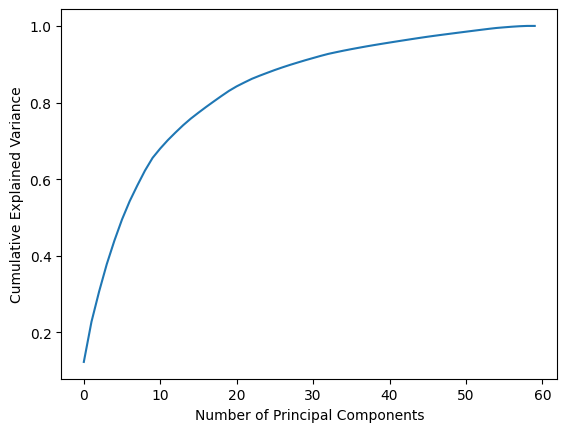

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

columns_to_exclude = ['Nazwa firmy', 'Wartość rynkowa', 'Sektor', "Rok"]
columns_to_include = [col for col in df_scaled.columns if col not in columns_to_exclude]
sectors = df_scaled['Sektor']
company_names = df_scaled['Nazwa firmy']
years = df_scaled['Rok']
df_scaled_filtered = df_scaled[columns_to_include]

pca_test = PCA().fit(df_scaled_filtered)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
explained_variance_ratio_cumulative = np.cumsum(pca_test.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio_cumulative > 0.97) + 1
n_components

46

In [ ]:
pca = PCA(n_components=n_components)
principal_components = pca.fit(df_scaled_filtered).transform(df_scaled_filtered)

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_diff['Wartość rynkowa'] > 0)
df_labels_encoded = pd.DataFrame({'Encoded_Labels': encoded_labels})
df_labels_encoded.head()

,Encoded_Labels
0,0
1,1
2,0
3,1
4,0


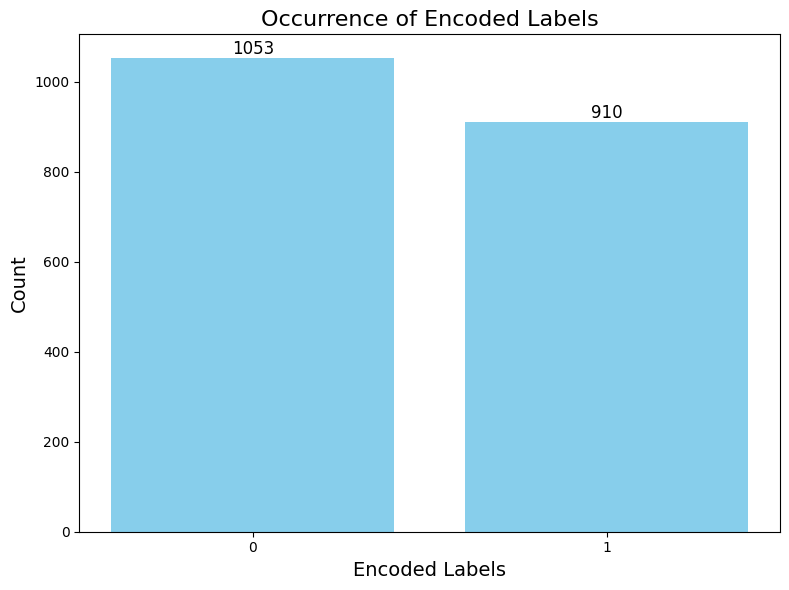

In [ ]:
import matplotlib.pyplot as plt

# Assuming value_counts is your DataFrame
value_counts = df_labels_encoded['Encoded_Labels'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))

# Setting x ticks to display only 0 and 1
plt.xticks([0, 1])

# Plotting the data
plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Adding title and labels
plt.title('Occurrence of Encoded Labels', fontsize=16)
plt.xlabel('Encoded Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding value annotations
for i, value in enumerate(value_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


**Analiza danych**

In [ ]:
print(df_scaled.shape)
df_scaled.describe()

(1963, 64)


,AKTYWA,Aktywa trwałe,Rzeczowe aktywa trwałe,Aktywa z tytułu poszukiwania i oceny zasobów mineralnych,Wartości niematerialne i prawne,Wartość firmy,Nieruchomości inwestycyjne,Aktywa z tytułu prawa do użytkowania,Inwestycje w jednostki powiązane,Długoterminowe aktywa finansowe,Długoterminowe pożyczki i należności,Aktywa z tytułu odroczonego podatku dochodowego,Długoterminowe rozliczenia międzyokresowe,Długoterminowe instrumenty pochodne,Pozostałe aktywa długoterminowe,Aktywa obrotowe,Zapasy,Aktywa niematerialne,Aktywa biologiczne,Należności handlowe,Pożyczki i pozostałe należności,Aktywa finansowe,Środki pieniężne i ich ekwiwalenty,Rozliczenia międzyokresowe,Aktywa z tytułu bieżącego podatku,Instrumenty pochodne,Pozostałe aktywa,Aktywa przeznaczone do zbycia i działalność zaniechana,PASYWA,Kapitał własny udziałowców podmiotu dominującego,Kapitał podstawowy,Należne wpłaty na kapitał podstawowy,Akcje/udziały własne,Kapitał zapasowy,Wyceny i różnice kursowe,Pozostałe kapitały,Zyski zatrzymane / niepokryte straty,Udziały niekontrolujące,Zobowiązania długoterminowe,Długoterminowe zobowiązania z tytułu instrumentów pochodnych,Długoterminowe kredyty i pożyczki,Długoterminowe zobowiązania z tytułu obligacji,Długoterminowe zobowiązania z tytułu leasingu,Długoterminowe zobowiązania handlowe,Długoterminowe rezerwy na świadczenia pracownicze,Rezerwa z tytułu odroczonego podatku dochodowego,Długoterminowe rezerwy,Pozostałe zobowiązania długoterminowe,Długoterminowe rozliczenia międzyokresowe (zobowiązania),Zobowiązania krótkoterminowe,Zobowiązania z tytułu instrumentów pochodnych,Zobowiązania finansowe (kredyty i pożyczki),Zobowiązania z tytułu obligacji,Zobowiązania z tytułu leasingu,Zobowiązania handlowe,Świadczenia pracownicze,Zobowiązania z tytułu bieżącego podatku,Rezerwy,Pozostałe zobowiązania,Rozliczenia międzyokresowe (zobowiązania),Wartość rynkowa,Rok
count,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000
mean,0.082375,0.034823,0.001104,0.011280,0.003590,0.000977,0.000951,0.024582,0.010324,0.003950,0.004281,0.003244,0.012965,0.025418,0.007931,0.096461,0.002145,0.013901,0.009825,0.004408,0.018051,0.001088,0.012203,0.018148,0.009650,0.024656,0.035419,0.015997,0.082376,0.604894,0.011447,0.012734,0.027121,0.383532,0.316257,0.658836,0.080260,0.153398,0.002313,0.006887,0.001867,0.030119,0.003524,0.012858,0.025529,0.001859,0.013044,0.001323,0.002659,0.007847,0.011025,0.002311,0.001429,0.003647,0.009894,0.011378,0.003591,0.127390,0.000519,0.018023,0.015257,2015.764137
std,0.036798,0.031034,0.022612,0.038697,0.035168,0.022641,0.022636,0.092388,0.032687,0.035998,0.031925,0.025577,0.052602,0.118423,0.040115,0.054089,0.025071,0.062077,0.038769,0.025882,0.067687,0.022761,0.023075,0.070350,0.034105,0.096768,0.152832,0.054270,0.036799,0.018060,0.044079,0.054680,0.105265,0.091103,0.019264,0.025819,0.025454,0.027830,0.030079,0.036813,0.028390,0.143499,0.024213,0.058993,0.118304,0.026806,0.054822,0.022719,0.024047,0.023096,0.052149,0.031755,0.022986,0.024391,0.045698,0.051099,0.030553,0.110063,0.022570,0.069454,0.033924,3.566022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

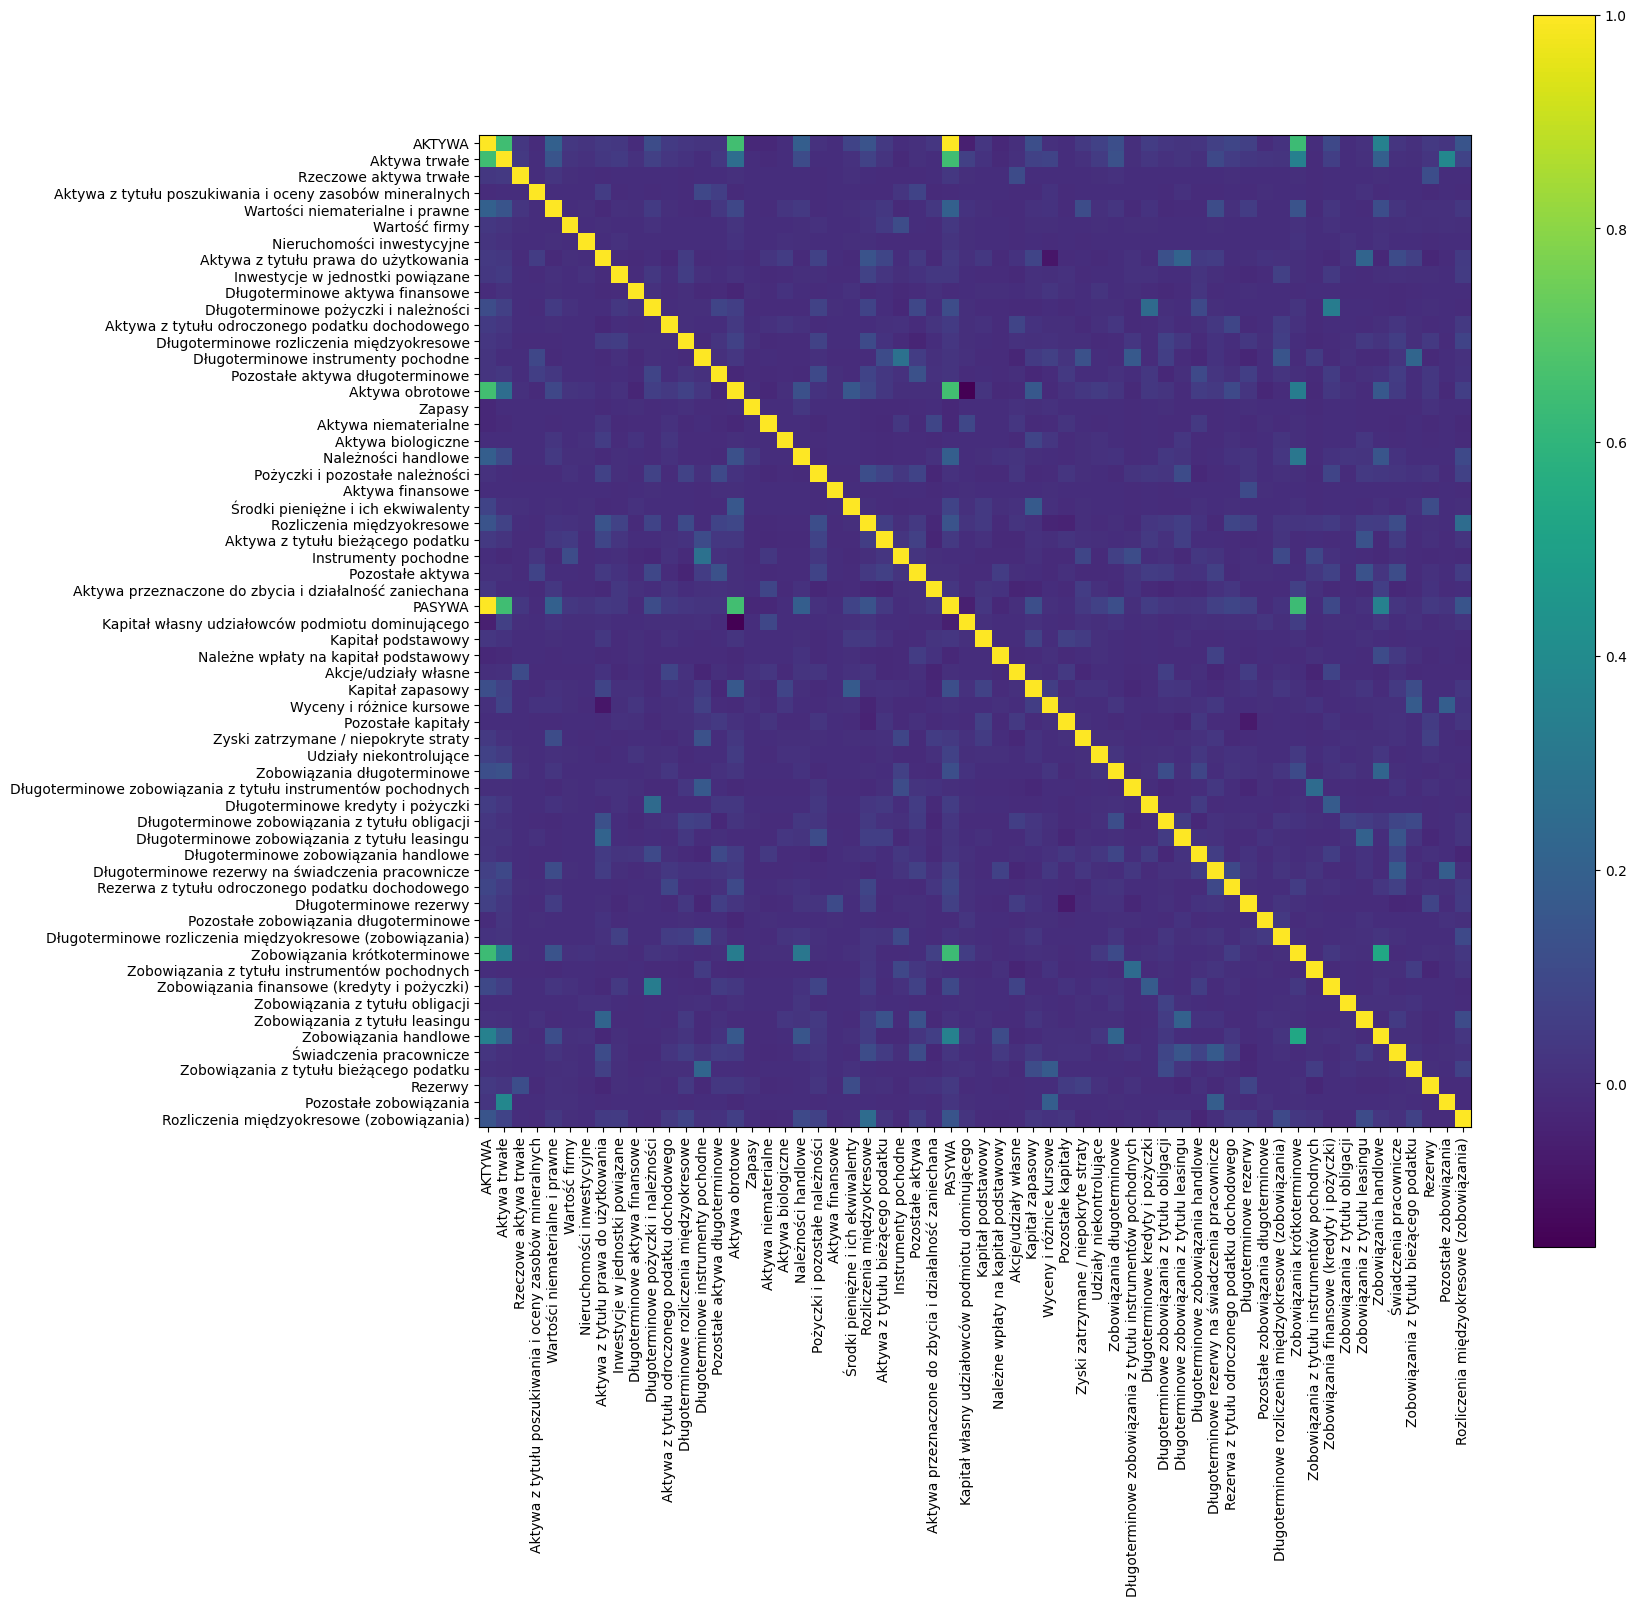

In [ ]:
import matplotlib.pyplot as plt

correlation_matrix = df_scaled_filtered.corr()
fig, ax = plt.subplots(figsize=(16, 16))
heatmap = ax.imshow(correlation_matrix)
plt.colorbar(heatmap)
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def draw_tsne(df_x, labels, label_name, anomalies=None):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(df_x)

    label_encoder = LabelEncoder()
    sektor_colors = label_encoder.fit_transform(labels)
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=sektor_colors, cmap='viridis', alpha=0.5)

    if anomalies is not None:
        anomaly_indices = tsne_data[anomalies == -1]
        plt.scatter(anomaly_indices[:,0], anomaly_indices[:,1], color='red', marker='x', label='Anomalies')

    plt.title(f't-SNE visualisation based on variable: {label_name}')
    plt.xlabel('t-SNE principal component 1')
    plt.ylabel('t-SNE principal component 2')
    plt.colorbar()
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
def draw_pca(X_pca, company_names, label="", anomalies=None):
    plt.figure(figsize=(8, 6))

    unique_names = np.unique(company_names)
    colors = plt.cm.get_cmap('tab10', len(unique_names))

    for i, name in enumerate(unique_names):
        mask = (company_names == name)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=name, color=colors(i), alpha=0.8)

    # Add markers for anomalies if provided
    if anomalies is not None:
        anomaly_indices = X_pca[anomalies == -1]
        plt.scatter(anomaly_indices[:,0], anomaly_indices[:,1], color='red', marker='x', label='Anomalies')

    plt.title('PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def draw_pca_3d(X_pca, company_names, label="", anomalies=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    unique_names = np.unique(company_names)
    colors = plt.cm.get_cmap('tab10', len(unique_names))

    for i, name in enumerate(unique_names):
        mask = (company_names == name)
        ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], label=name, color=colors(i), alpha=0.8)

    # Add markers for anomalies if provided
    if anomalies is not None:
        anomaly_indices = X_pca[anomalies == -1]
        ax.scatter(anomaly_indices[:, 0], anomaly_indices[:, 1], anomaly_indices[:, 2], color='red', marker='x', label='Anomalies')

    ax.set_title('3D PCA Plot')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend()
    plt.grid(True)
    plt.show()

**Anomaly detection**

In [ ]:
from sklearn.model_selection import StratifiedKFold

columns_to_exclude = ['Nazwa firmy','Wartość rynkowa', 'Sektor', 'Rok']
columns_to_include = [col for col in df_scaled.columns if col not in columns_to_exclude]
X = df_scaled[columns_to_include]

In [ ]:
def create_autoencoder(size):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(size,)),
            tf.keras.layers.Dense(40, activation='sigmoid'),
            tf.keras.layers.Dense(20, activation='sigmoid'),
            tf.keras.layers.Dense(10, activation='gelu'),
            tf.keras.layers.Dense(20, activation='sigmoid'),
            tf.keras.layers.Dense(40, activation='sigmoid'),
            tf.keras.layers.Dense(size)
        ])
        return model

62/62 [==============================] - 0s 1ms/step


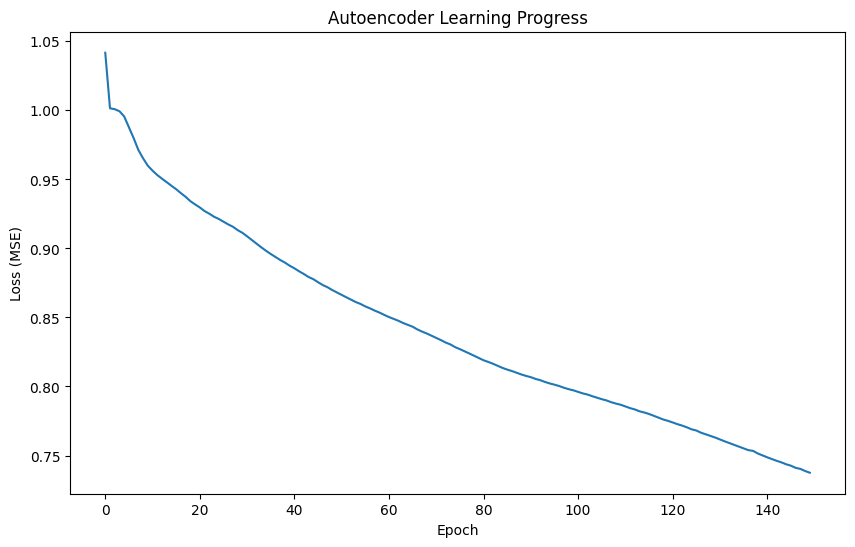

Indices of outliers: [   3   15   26   63   65   81   82   92  108  113  132  156  157  167
  168  174  179  183  230  235  327  329  337  373  374  376  405  409
  423  440  454  460  534  535  545  561  566  603  649  659  686  690
  691  703  705  706  764  811  838  878  943  964 1016 1029 1059 1063
 1081 1096 1121 1130 1175 1185 1188 1202 1240 1383 1385 1409 1472 1487
 1497 1504 1516 1584 1589 1635 1666 1683 1687 1732 1758 1759 1774 1817
 1821 1822 1838 1843 1875 1887 1895 1900 1909 1911 1914 1918 1922 1932
 1961]


In [ ]:
def train_autoencoder_and_identify_outliers(df):
    scaled_data = StandardScaler().fit_transform(df)

    autoencoder = create_autoencoder(df.shape[1])
    autoencoder.compile(optimizer='adam', loss='mse')
    history = autoencoder.fit(scaled_data, scaled_data, epochs=150, batch_size=32, verbose=0)

    reconstructed_data = autoencoder.predict(scaled_data)
    mse = np.mean(np.power(scaled_data - reconstructed_data, 2), axis=1)
    outliers_indices = np.where(mse > np.percentile(mse, 95))[0]

    # Plot the learning progress
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.title('Autoencoder Learning Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.show()

    # Return outliers
    return outliers_indices, autoencoder

outliers, autoencoder = train_autoencoder_and_identify_outliers(X)
print("Indices of outliers:", outliers)
outliers_array = np.where(np.isin(np.arange(X.shape[0]), outliers), -1, 1)


In [ ]:
from sklearn.ensemble import IsolationForest
def detect_anomalies(df_x, model):
  anomaly_labels = model.fit_predict(df_x)
  return anomaly_labels

In [ ]:
def test_dataframe(df):

  columns_to_exclude = ['Nazwa firmy','Wartość rynkowa', "Sektor", "Rok"]
  columns_to_include = [col for col in df_scaled.columns if col not in columns_to_exclude]
  sectors = df['Sektor']
  company_names = df['Nazwa firmy']
  years = df['Rok']
  df = df[columns_to_include]
  #label_encoder = LabelEncoder()
  #df['Sektor'] = label_encoder.fit_transform(df['Sektor'])


  sector_counts = sectors.value_counts()
  top_3_sectors_ids = sectors.isin(sector_counts.head(3).index.tolist())
  top_3_sectors = df[top_3_sectors_ids]
  new_3_sectors = sectors[top_3_sectors_ids]
  new_3_company_names = company_names[top_3_sectors_ids]
  new_3_years = years[top_3_sectors_ids]

  top_1_sectors_ids = sectors.isin(sector_counts.head(1).index.tolist())
  top_1_sectors = df[top_1_sectors_ids]
  new_1_sectors = sectors[top_1_sectors_ids]
  new_1_company_names = company_names[top_1_sectors_ids]
  new_1_years = years[top_1_sectors_ids]


  anomalies_df = detect_anomalies(df,IsolationForest(random_state=42))
  anomalies_1_df = detect_anomalies(top_1_sectors, IsolationForest(random_state=42))
  anomalies_3_df = detect_anomalies(top_3_sectors, IsolationForest(random_state=42))

  principal_components = pca.fit(df).transform(df)
  principal_components_1 = pca.fit(top_1_sectors).transform(top_1_sectors)
  principal_components_3 = pca.fit(top_3_sectors).transform(top_3_sectors)

  anomalies_df_pca = detect_anomalies(principal_components,IsolationForest(random_state=42))
  anomalies_1_df_pca = detect_anomalies(principal_components_1, IsolationForest(random_state=42))
  anomalies_3_df_pca = detect_anomalies(principal_components_3, IsolationForest(random_state=42))

  draw_tsne(df,sectors, "sector")
  draw_tsne(df,sectors, "sector", anomalies_df)

  draw_tsne(top_3_sectors,new_3_sectors, "sector")
  draw_tsne(top_3_sectors,new_3_sectors, "sector", anomalies_3_df)
  draw_tsne(top_3_sectors,new_3_company_names, "sector")
  draw_tsne(top_3_sectors,new_3_years, "year")

  draw_tsne(top_1_sectors,new_1_sectors, "sector")
  draw_tsne(top_1_sectors,new_1_company_names, "company name")
  draw_tsne(top_1_sectors,new_1_company_names, "company name", anomalies_1_df)
  draw_tsne(top_1_sectors,new_1_years, "year")


  draw_pca(principal_components_1,new_1_company_names, "company name")
  draw_pca_3d(principal_components_1,new_1_company_names, "company name")
  draw_pca(principal_components_1,new_1_company_names, "company name", anomalies_1_df_pca)
  draw_pca_3d(principal_components_1,new_1_company_names, "company name", anomalies_1_df_pca)
  draw_pca(principal_components_3,new_3_sectors, "sector")
  draw_pca_3d(principal_components_3,new_3_sectors, "sector")
  draw_pca(principal_components_3,new_3_sectors, "sector", anomalies_3_df_pca)
  draw_pca_3d(principal_components_3,new_3_sectors, "sector", anomalies_3_df_pca)


In [ ]:
#from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()
#df_with_market_value_scaled = df_with_market_value.copy()
#columns_not_to_scale = ['Nazwa firmy', 'Rok']
#columns_to_scale = df_with_market_value_scaled.columns.difference(columns_not_to_scale)
#df_with_market_value_scaled[columns_to_scale] = scaler.fit_transform(df_with_market_value_scaled[columns_to_scale])

In [ ]:
#test_dataframe(df_diff)

<ipython-input-77-ada9c0320f4e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sektor'] = label_encoder.fit_transform(df['Sektor'])


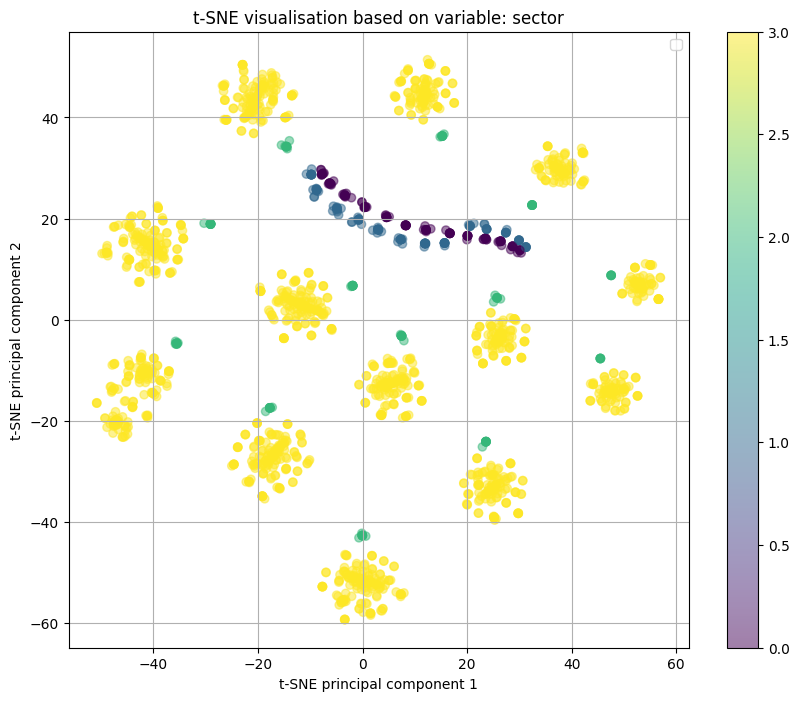

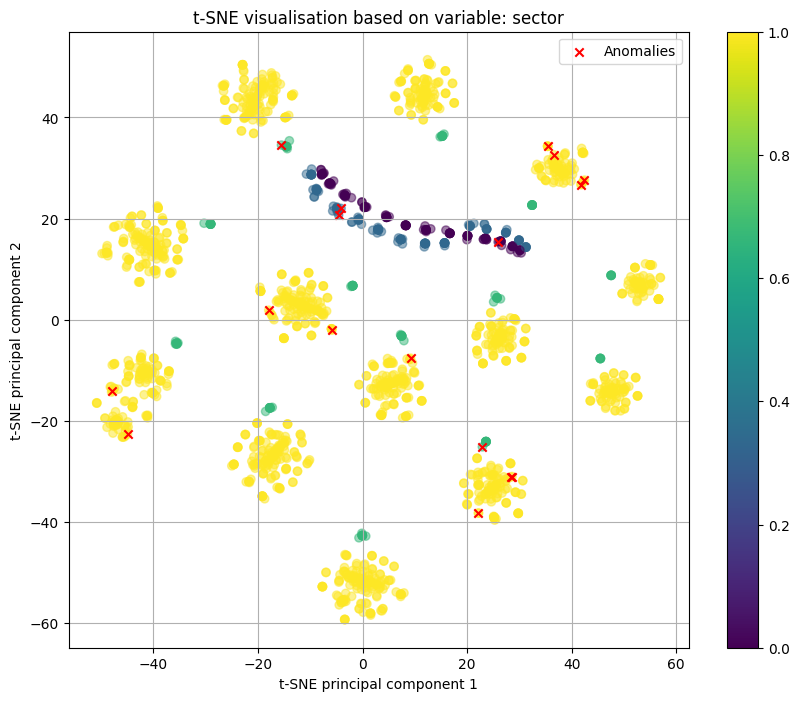

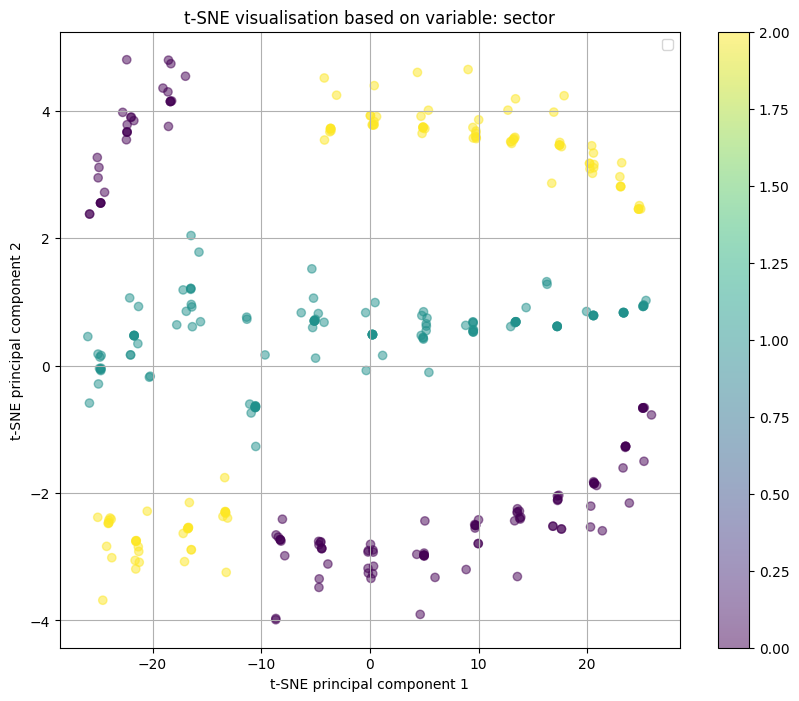

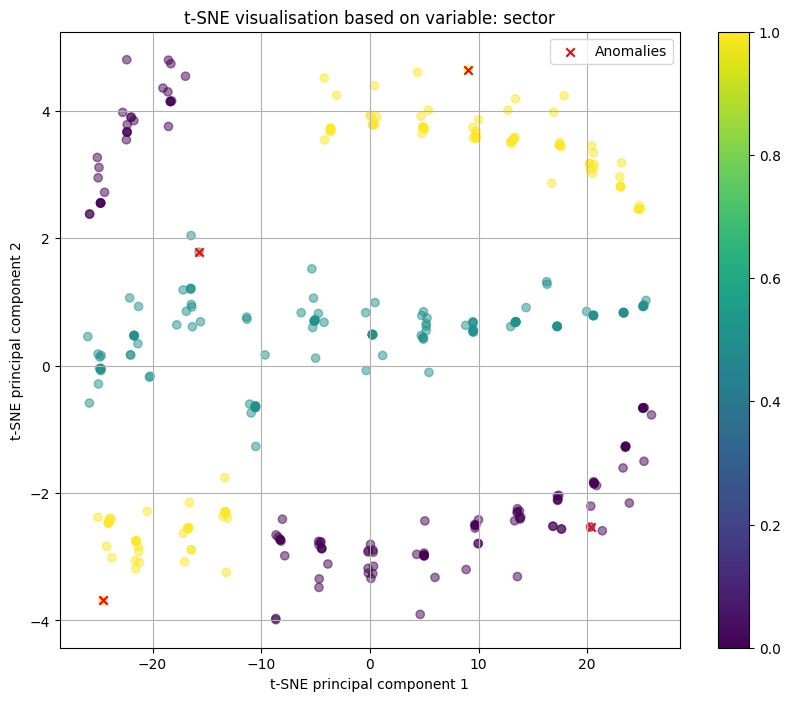

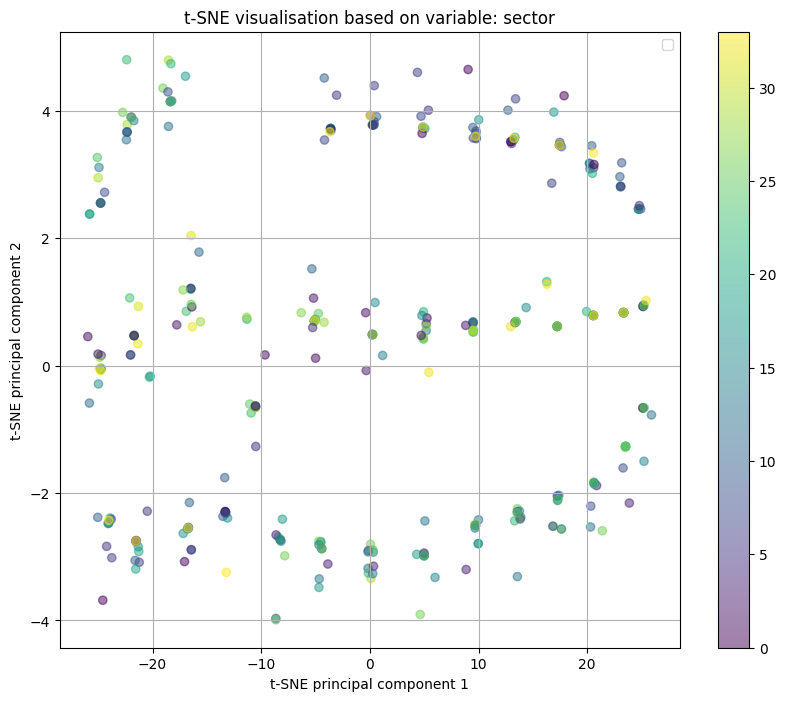

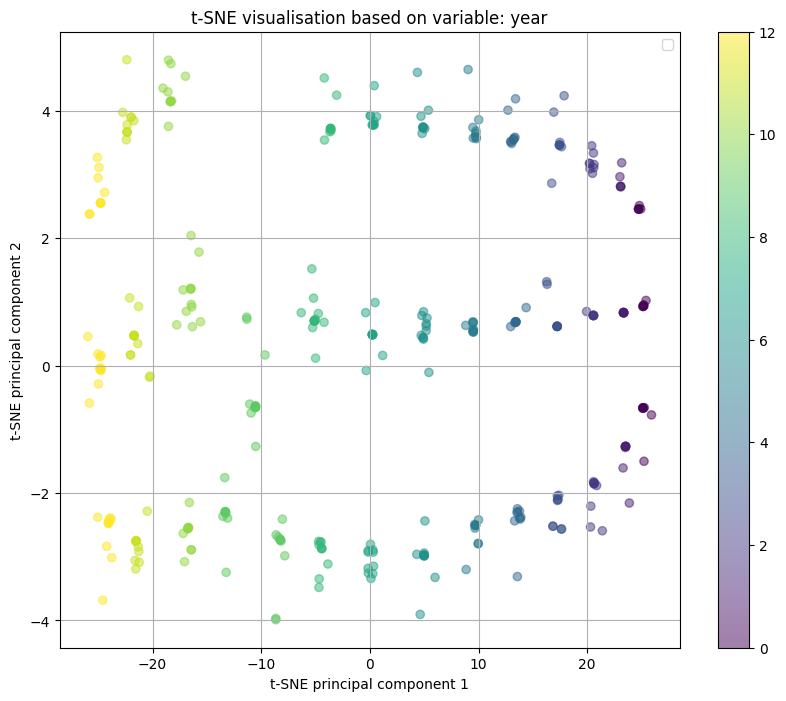

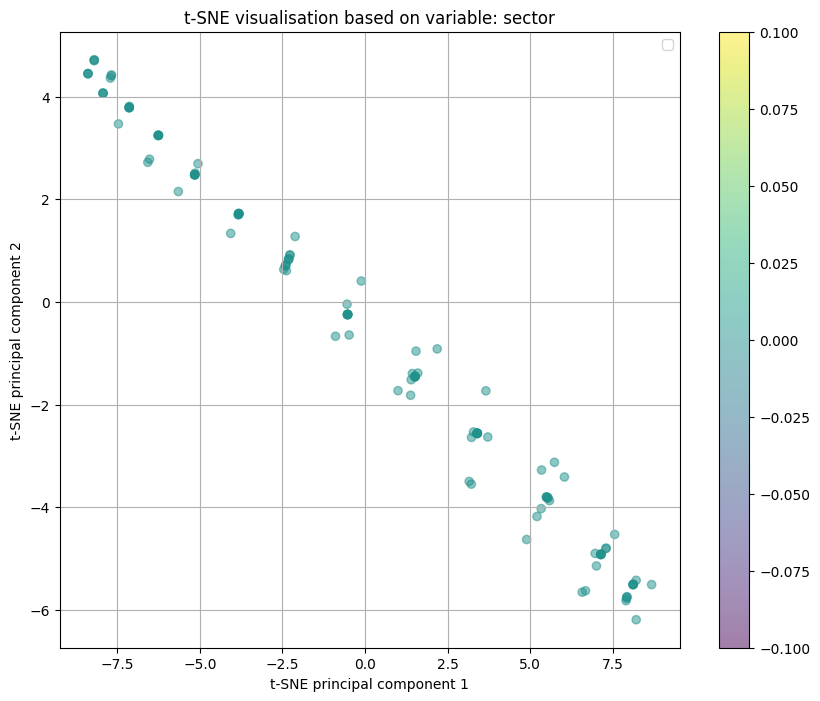

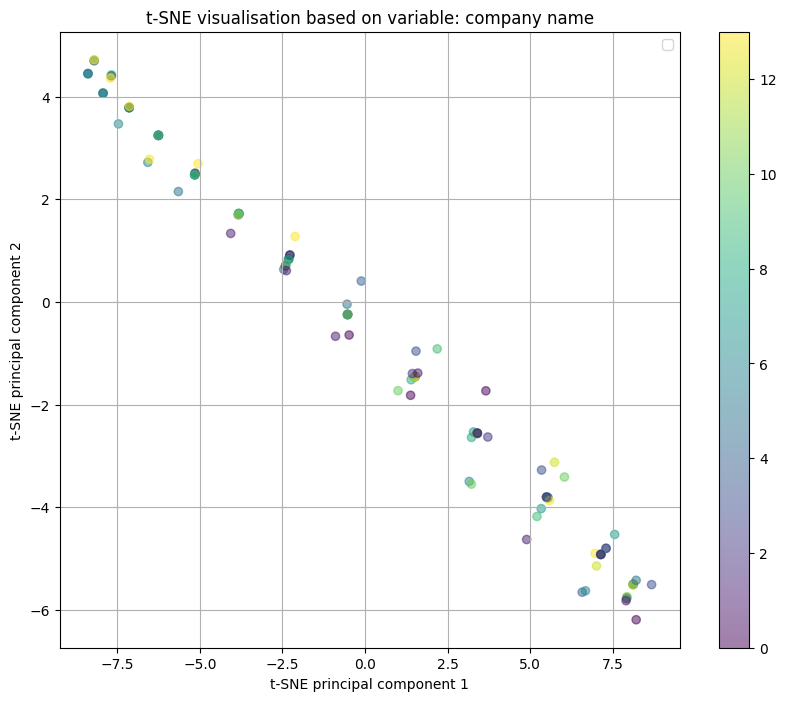

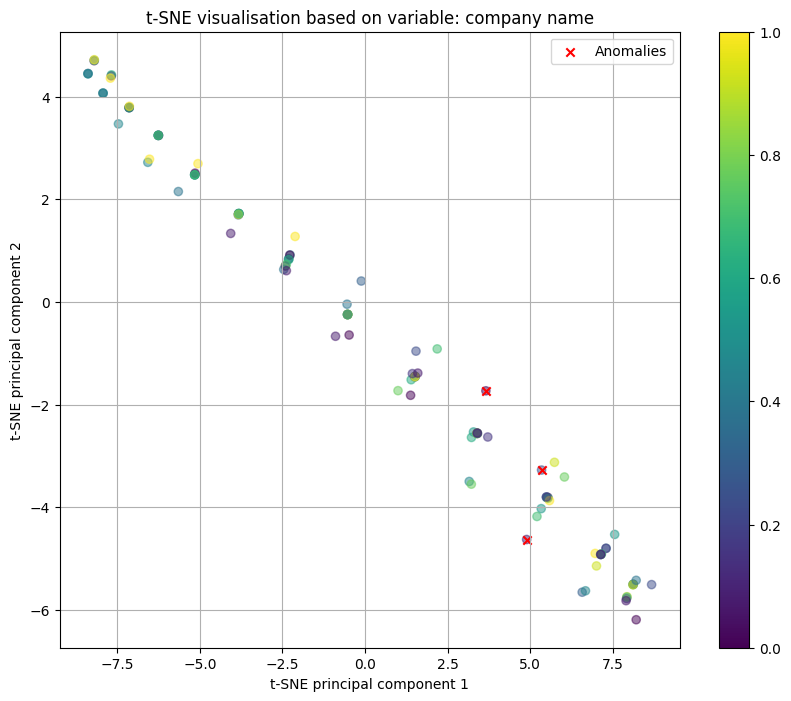

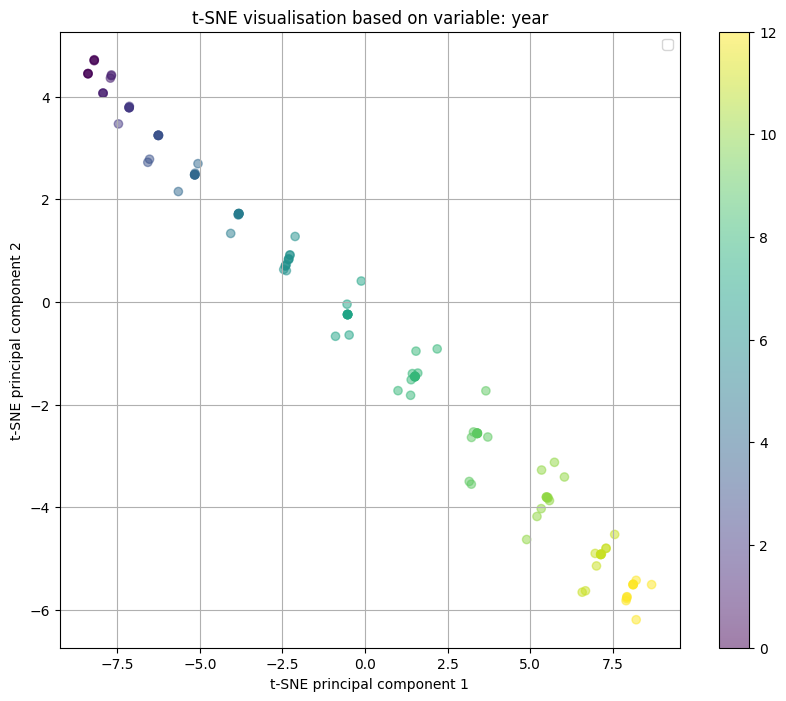

<ipython-input-69-2cfa9c0fd103>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_names))


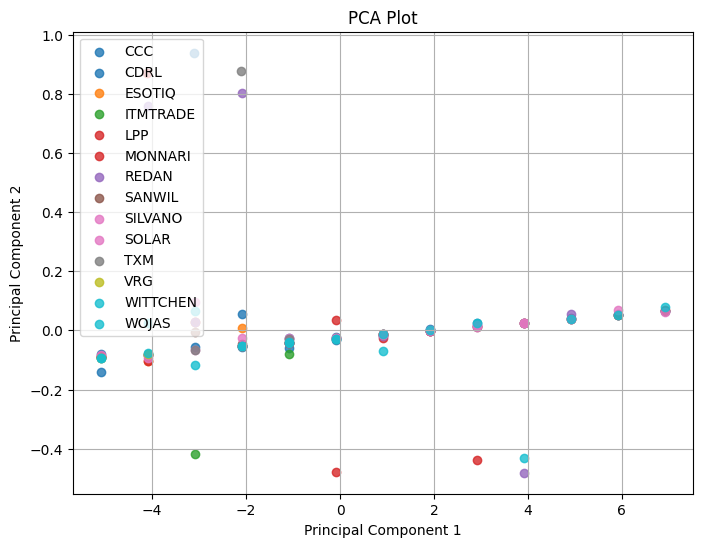

<ipython-input-70-08480fcdccf7>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_names))


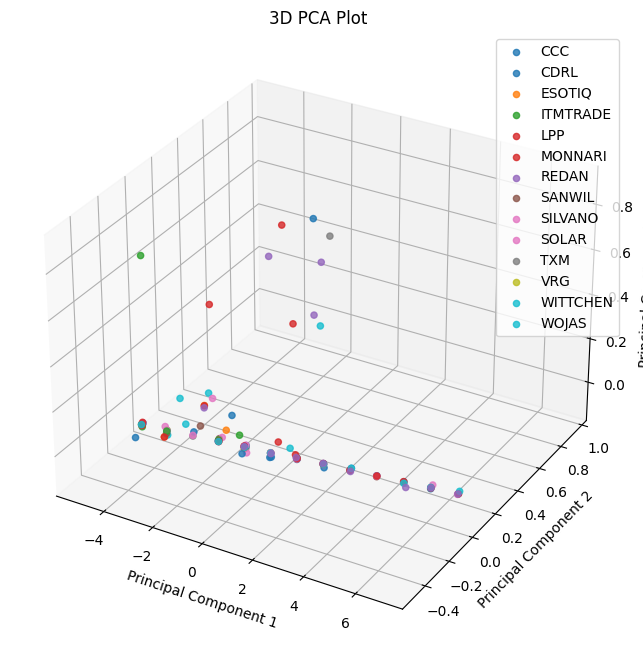

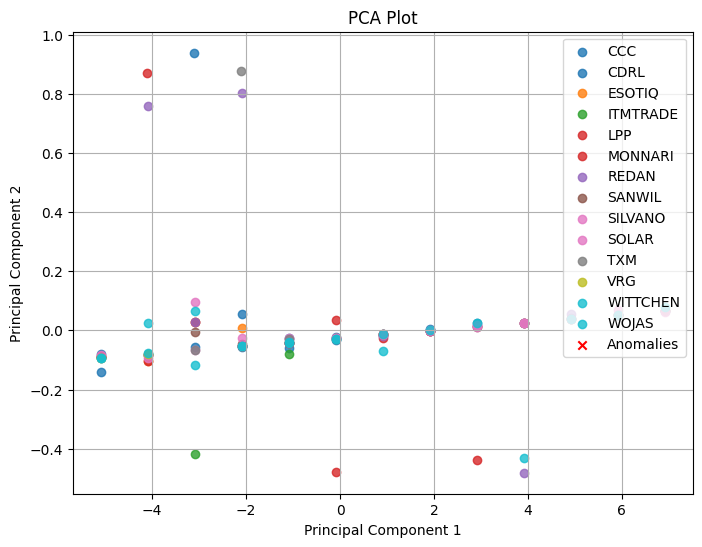

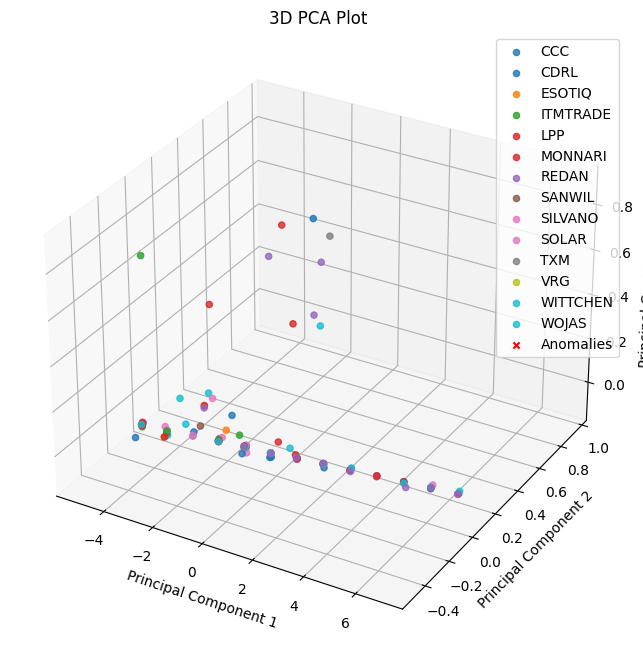

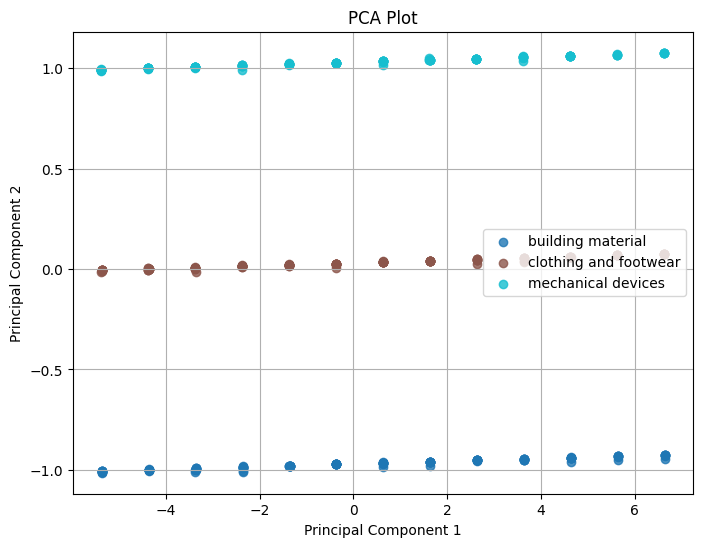

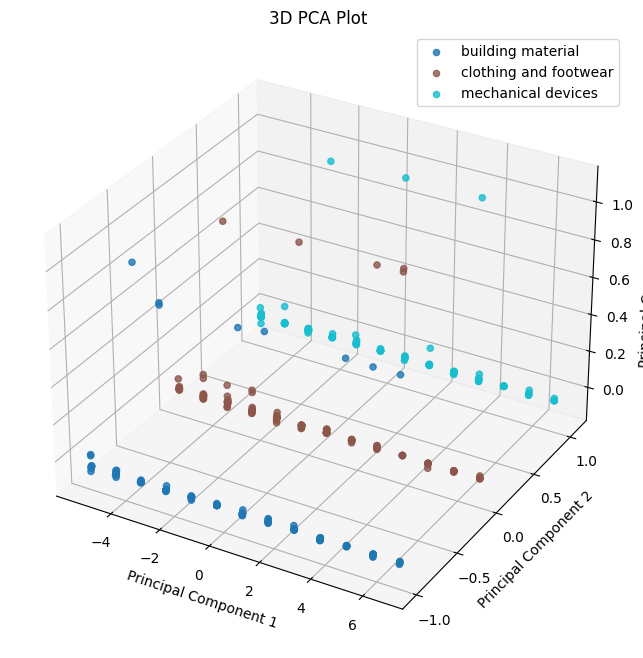

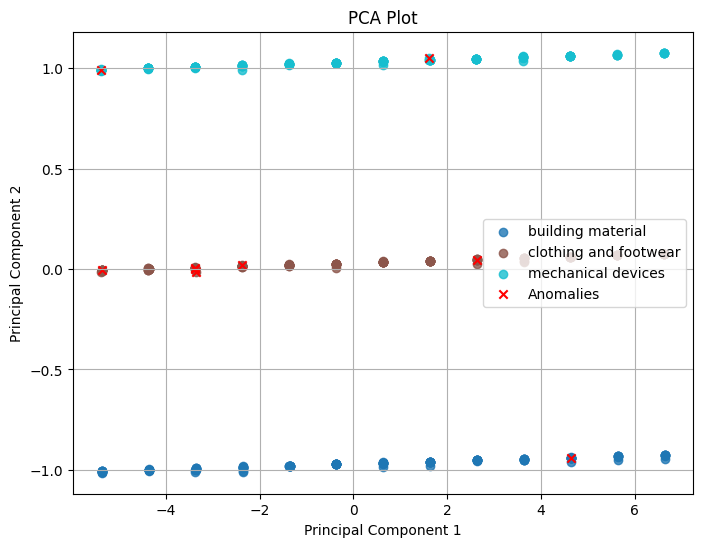

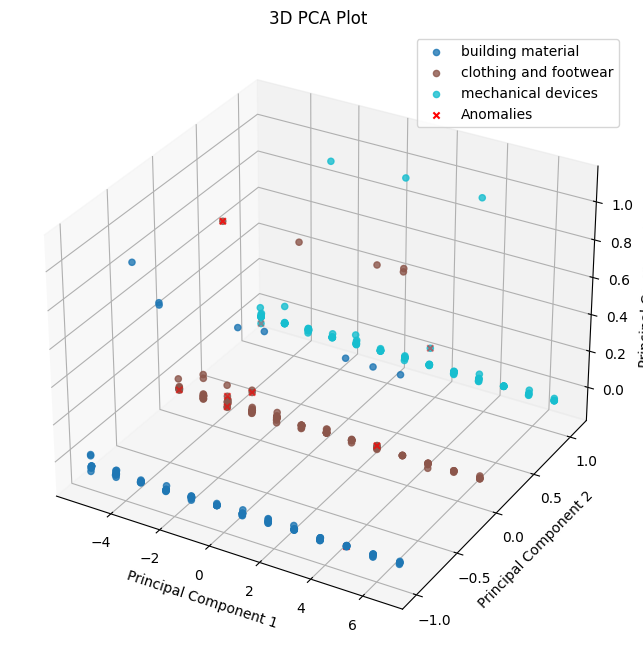

In [ ]:
test_dataframe(df_scaled)

=======================

In [ ]:
columns_to_exclude = ['Nazwa firmy','Wartość rynkowa', 'Sektor', 'Rok']
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]
scaled_data = df_scaled[columns_to_include]

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

In [ ]:
def visualize_anomalies():

    models = {
        "Isolation Forest": IsolationForest(contamination=0.05),
        "Local Outlier Factor": LocalOutlierFactor(contamination=0.05),
        "One-Class SVM": OneClassSVM(nu=0.05)
    }

    scaled_data_tensor = tf.convert_to_tensor(scaled_data, dtype=tf.float32)
    reconstructed_data = autoencoder.predict(scaled_data_tensor)

    mse = np.mean(np.power(scaled_data - reconstructed_data, 2), axis=1)
    autoencoder_outliers = np.where(mse > np.percentile(mse, 95))[0]

    # Step 5: Detect anomalies with other models
    plt.figure(figsize=(10, 15))
    for i, (model_name, model) in enumerate(models.items(), 1):
        plt.subplot(len(models) + 1, 1, i)
        y_pred = model.fit_predict(scaled_data)
        anomalies = tsne_data[y_pred == -1]
        inliers = tsne_data[y_pred == 1]

        plt.scatter(inliers[:, 0], inliers[:, 1], color='blue', label='Inliers')
        plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')
        plt.title(model_name)
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.legend()

    # Plot autoencoder anomalies
    plt.subplot(len(models) + 1, 1, len(models) + 1)
    autoencoder_inliers = tsne_data[np.setdiff1d(np.arange(len(tsne_data)), autoencoder_outliers)]
    autoencoder_anomalies = tsne_data[autoencoder_outliers]

    plt.scatter(autoencoder_inliers[:, 0], autoencoder_inliers[:, 1], color='blue', label='Inliers')
    plt.scatter(autoencoder_anomalies[:, 0], autoencoder_anomalies[:, 1], color='red', label='Anomalies')
    plt.title("Autoencoder Anomalies")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

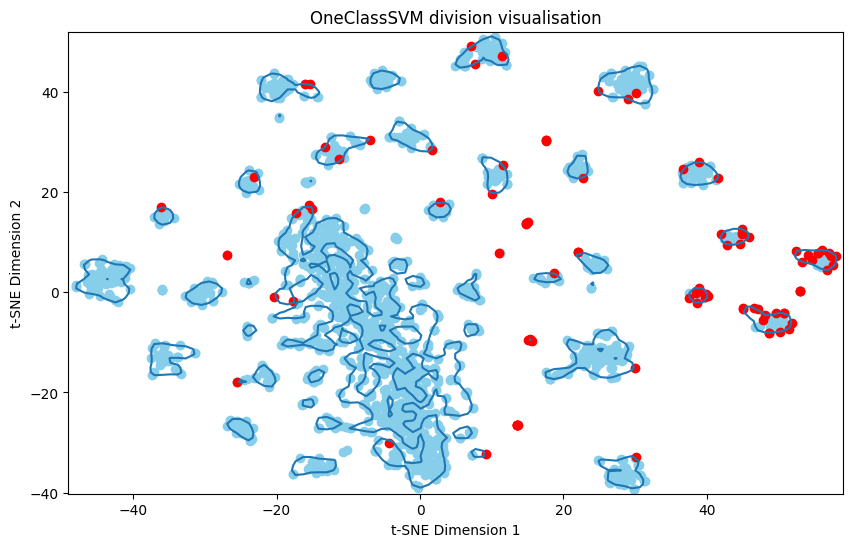

In [ ]:
def draw_one_class_svm():
  # Define estimator (One-Class SVM)
  estimator_hard_margin = OneClassSVM(nu=0.05,gamma=0.15)  # Very small nu for hard margin
  y_pred = estimator_hard_margin.fit_predict(scaled_data)
  anomalies = tsne_data[y_pred == -1]
  inliers = tsne_data[y_pred == 1]


  # Plotting setup
  fig, ax = plt.subplots(figsize=(10, 6))
  colors = ["tab:blue", "tab:orange", "tab:blue"]

  # Hard Margin OCSVM
  estimator_hard_margin.fit(tsne_data)
  DecisionBoundaryDisplay.from_estimator(
      estimator_hard_margin,
      tsne_data,
      response_method="decision_function",
      plot_method="contour",
      levels=[0],
      colors=colors[2],
      ax=ax,
  )

  ax.scatter(inliers[:, 0], inliers[:, 1], color='skyblue', label='Inliers')
  ax.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')
  ax.set(
      xlabel="t-SNE Dimension 1",
      ylabel="t-SNE Dimension 2",
      title="OneClassSVM division visualisation",
  )

  plt.show()
draw_one_class_svm()

62/62 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


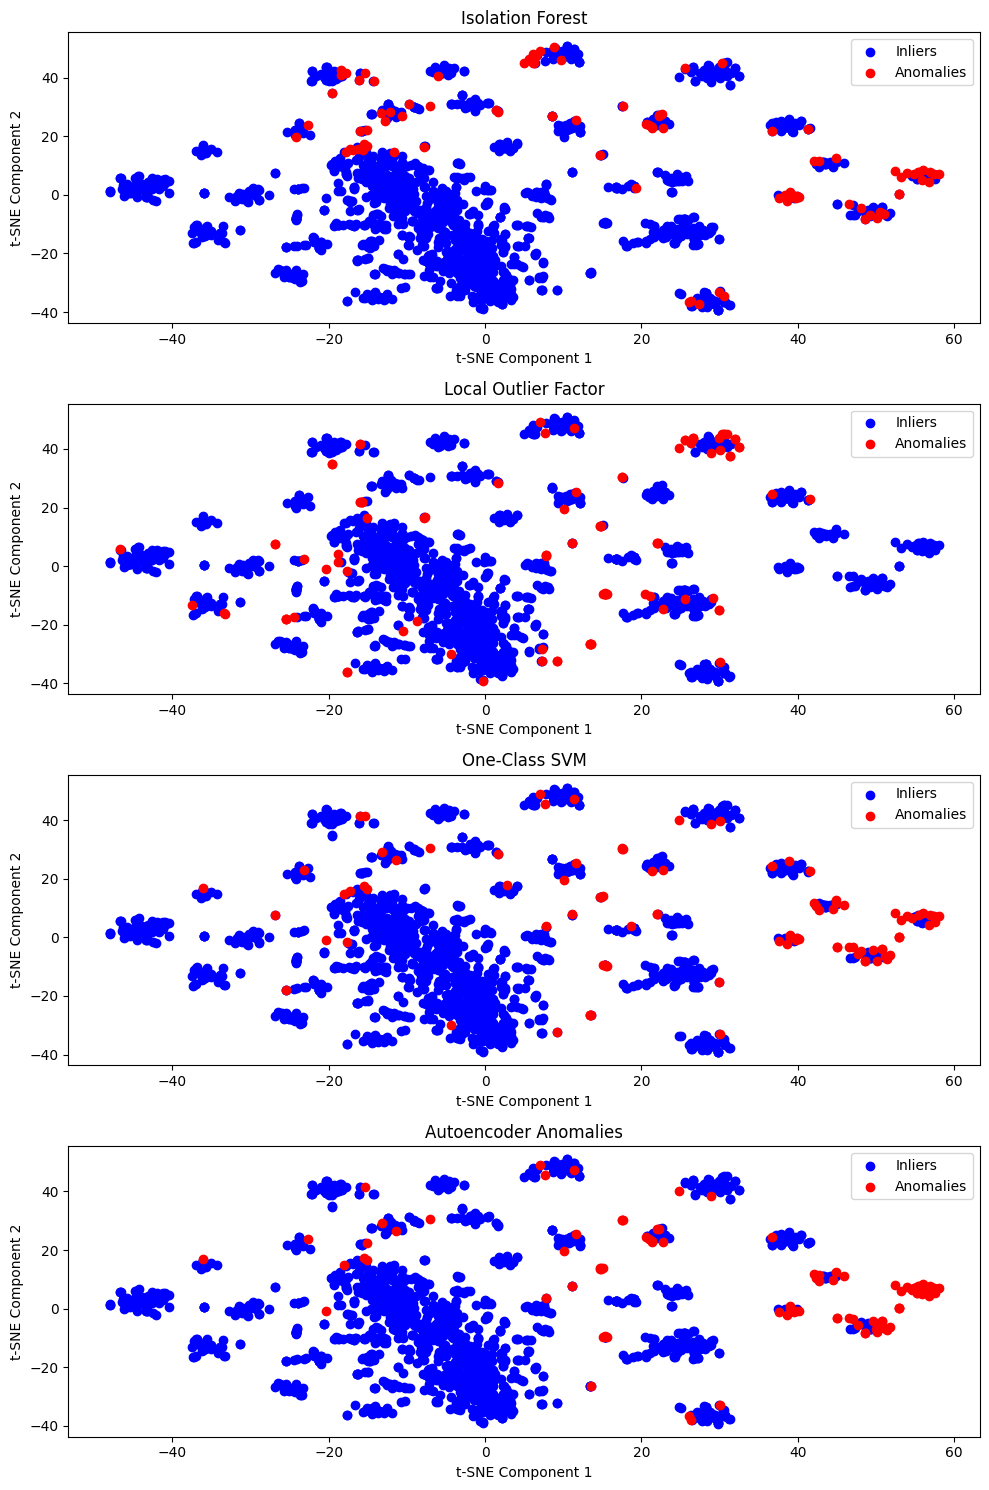

In [ ]:
visualize_anomalies()

In [ ]:
sectors = df_scaled["Sektor"]
sector_counts = sectors.value_counts()
top_1_sectors_ids = sectors.isin(sector_counts.head(1).index.tolist())
top_1_sectors = df_scaled[top_1_sectors_ids]
top_3_sectors_ids = sectors.isin(sector_counts.head(3).index.tolist())
top_3_sectors = df_scaled[top_3_sectors_ids]

In [ ]:
top_1_sectors_ids = sectors.isin(sector_counts.head(1).index.tolist())
top_1_sectors = df_scaled[top_1_sectors_ids]
columns_to_exclude = ['Nazwa firmy','Wartość rynkowa', 'Sektor', 'Rok']
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]
top_1_sectors = top_1_sectors[columns_to_include]

In [ ]:
def visualize_lof_anomalies(df):
    columns_to_exclude = ['Nazwa firmy','Wartość rynkowa', 'Sektor', 'Rok']
    columns_to_include = [col for col in df.columns if col not in columns_to_exclude]
    scaled_data = df[columns_to_include]

    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(scaled_data)

    model_name, model = "Local Outlier Factor", LocalOutlierFactor(n_neighbors=7, contamination=0.05)

    y_pred = model.fit_predict(scaled_data)
    lof_scores = -model.negative_outlier_factor_
    anomalies = tsne_data[y_pred == -1]
    inliers = tsne_data[y_pred == 1]

    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=100 * lof_scores, facecolors='none', edgecolors='red', alpha=0.5)
    plt.scatter(inliers[:, 0], inliers[:, 1], color='blue', label='Inliers')
    plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

    plt.title(model_name)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

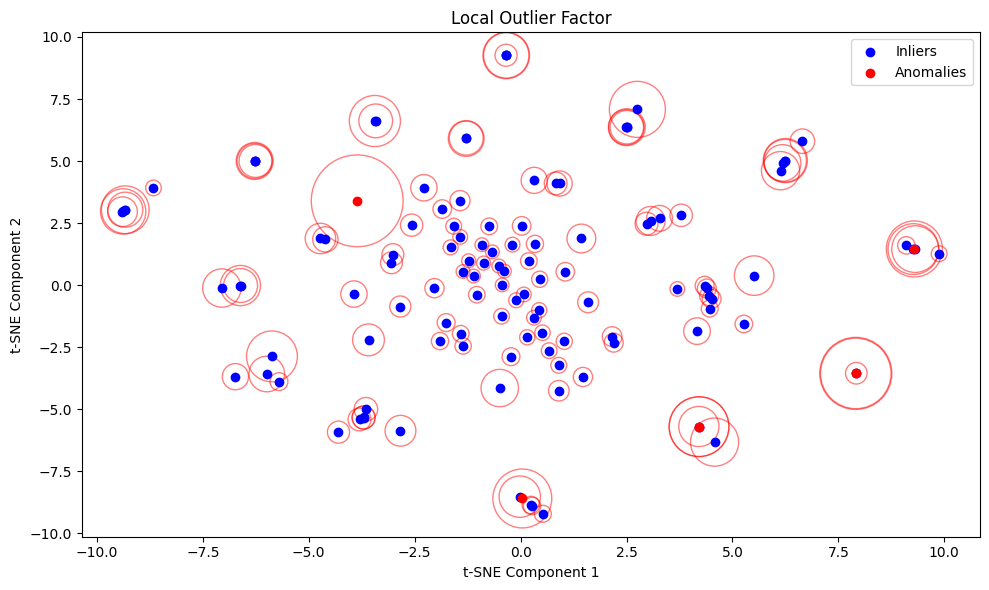

In [ ]:
visualize_lof_anomalies(top_1_sectors)

In [ ]:
def visualize_isolation_forest_anomalies(df):
    tsne_data = df
    model = IsolationForest(contamination=0.05)
    model.fit(tsne_data)

    y_pred = model.predict(tsne_data)
    fig, ax = plt.subplots(figsize=(12, 4))

    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        tsne_data,
        response_method="decision_function",
        alpha=0.5,
        ax=ax
    )

    scatter = disp.ax_.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_pred, s=18, edgecolor="k")
    handles, labels = scatter.legend_elements()
    disp.ax_.set_title("Path length decision boundary of IsolationForest")
    plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
    plt.colorbar(scatter)
    plt.show()

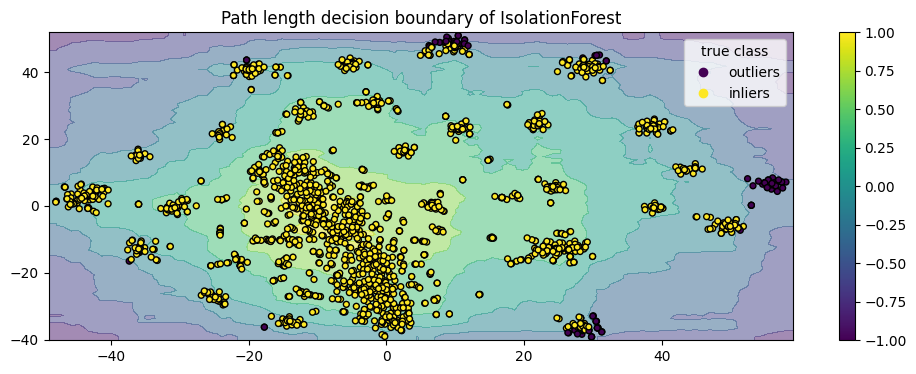

In [ ]:
visualize_isolation_forest_anomalies(tsne_data)